This notebook generates synthetic data assuming the following distributions using data trends for the united states <br>
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC8248516/ <br>
https://acrjournals.onlinelibrary.wiley.com/doi/10.1002/acr.25316 <br>
https://www.healthline.com/health/mens-health/average-weight-for-men#_noHeaderPrefixedContent <br>
DataSet source for age, weight and height: https://online.stat.psu.edu/stat200/book/export/html/242 <br>
https://my.clevelandclinic.org/health/articles/9464-body-mass-index-bmi <br>
https://www.shoremedicalcenter.org/news/managing-joint-pain-over-counter-medication <br>
https://www.ncbi.nlm.nih.gov/books/NBK560692/ <br>
https://www.cdc.gov/dhdsp/health_equity/socioeconomic.htm <br>
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3408027/ <br>
https://www.bls.gov/ors/factsheet/sit-and-stand.htm <br>
https://www.bls.gov/news.release/ors.nr0.htm <br>
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4306423/

OTCs repeat

- No. Records - 1000
- Episodes: normally distributed
- Duration: mean 42
- OTC1Select: Injury (Device, Nutrition, Pain_Med), Medical - (Nutrition, Pain_Med), Obesity - (Nutrition, Pain_Med) 1 - 32
- OTCCategory - Pain_Med, Nutrition, Device
- OTCAge: 40 - 80 randomly distributed with mean of 60
- OTCGender: 50% male and female
- OTCHeight: normally distributed for male and female
- OTCWeight: 40% obsese, 20% overweight, 40% normal weight right skewed
- OTCEverDoneExcersise: binary (obese and overweight 2times likely if OTCDoctor is yes)
- OTCSpanish: equal prob
- OTCRace: Black, White, American Indian (30% each), Asian 5%, Naitve 3, Unknown,1 Prefer not to say 1
- OTCUSRegion: equal prob
- OTCZip: high-level, mid-level, low-level
- OTCEducation
- OTCEmployment
- OTCIncome - based on num of years of education and region
- OTCStand - correlated to OTCCause1_Choice4
- OTCInsurance - Yes high level, mid- 70% yes, 30% no,  60% No low income, 40% Yes
- OTC1Cause: Use BMI > 25 for obsesity
- OTC1PrePain: normally distributed
- OTC1UseTime: average 2 days, must be less than or equal to duration - should be longer for injuries. if injury average 14days, std 2
- OTC1PostPain: if use time was less than 5 days, post < pre, if more randomly generate
- OTC1WhyStop: if OTCSelect is 32- 5, if pre < post - 1,  if pre > post 2, 3, 4, 
- OTC1WillingTOPay: average 388 mid to high, low income should be lower, correlated with demographic data 
- OTC1UseSameTime: binary
- OTC1PainLocation: equal probability
- OTC1PainTime: equal probability
- OTC1CocomtSymptom: Injury(Disabling Pain, Inability to bear weight, swelling, redness, instability or weakness, limited range), medical(fever, stiffness, popping, redness, inability to be weight, locking of knee), obesity(no fever but other combinations)
- OTC1Doctor: Injury or medical 2 times likely Yes, if why stop is 4, also yes else no
- OTC1Prescription: Randomly Select one using classes Injury (Device or Nutrition or Pain relief), Medical - (Nutrition or Pain relief), Obesity - (Nutrition or Pain relief)


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Create Demographic Data

In [2]:
#census data with weight and height
df1 = pd.read_csv("insurance.csv")
df1.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
condition = [df1["sex"].isin(["female"]),df1["sex"].isin(["male"])]
choice = [0,1]
df1["sex"] = np.select(condition,choice)
df1.rename(columns={"age":"OTCAge","sex":"OTCGender","region":"OTCRegion"},inplace=True)
df1.drop(columns=["children","smoker","charges"],inplace=True)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   OTCAge     1338 non-null   int64  
 1   OTCGender  1338 non-null   int32  
 2   bmi        1338 non-null   float64
 3   OTCRegion  1338 non-null   object 
dtypes: float64(1), int32(1), int64(1), object(1)
memory usage: 36.7+ KB


In [4]:
df2 = pd.read_csv("body.csv")
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 507 entries, 0 to 506
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     507 non-null    int64  
 1   Height  507 non-null    float64
 2   Weight  507 non-null    float64
 3   Gender  507 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 16.0 KB


In [5]:
df2["bmi"] = round((df2["Weight"] * 703) / (df2["Height"] ** 2), 1)
df2["bmi"].describe()

count    507.000000
mean      27.665483
std        9.589415
min        9.200000
25%       20.150000
50%       25.700000
75%       34.300000
max       61.100000
Name: bmi, dtype: float64

In [6]:
df2.rename(columns={"Age":"OTCAge","Gender":"OTCGender"},inplace=True)
df2["OTCRegion"] = np.random.choice(df1["OTCRegion"],df2.shape[0],replace=True)
df2.drop(columns = ["Height","Weight"],inplace=True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 507 entries, 0 to 506
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   OTCAge     507 non-null    int64  
 1   OTCGender  507 non-null    int64  
 2   bmi        507 non-null    float64
 3   OTCRegion  507 non-null    object 
dtypes: float64(1), int64(2), object(1)
memory usage: 16.0+ KB


In [7]:
df = pd.concat([df1,df2])
df.sort_values(by=["OTCAge","OTCGender"],ascending=True,inplace=True)
df.head()

,OTCAge,OTCGender,bmi,OTCRegion
31,18,0,26.315,northeast
46,18,0,38.665,northeast
50,18,0,35.625,northeast
102,18,0,30.115,northeast
161,18,0,36.850,southeast


Create unique index for demographic data for use in merging

In [8]:
#Get unique index for df
age_gender_count = df.groupby(["OTCAge"])["OTCGender"].value_counts().reset_index()
age_gender_count["OTCAge"] = age_gender_count["OTCAge"].astype(str)
age_gender_count["OTCGender"] = age_gender_count["OTCGender"].astype(str)
age_gender_count["index"] = age_gender_count["OTCAge"].str.cat(age_gender_count["OTCGender"],sep="_" )
age_gender_count.sort_values(by=["OTCAge","OTCGender"],ascending=True,inplace=True)
age_gender_count.reset_index(drop=True,inplace=True)
age_gender_count.head()

,OTCAge,OTCGender,count,index
0,18,0,36,18_0
1,18,1,37,18_1
2,19,0,53,19_0
3,19,1,37,19_1
4,20,0,39,20_0


In [9]:
index = pd.DataFrame()
for i,row in age_gender_count.iterrows():
    ids = np.arange(1,int(row["count"])+1)
    idxs = pd.DataFrame([row["index"] +"_"+ str(idx) for idx in ids])
    index = pd.concat([index,idxs])

index.rename(columns={0:"index"},inplace=True)

In [10]:
#Unique index for df
demo = df.set_index(keys=index["index"])
demo.head()

,OTCAge,OTCGender,bmi,OTCRegion
index,,,,
18_0_1,18,0,26.315,northeast
18_0_2,18,0,38.665,northeast
18_0_3,18,0,35.625,northeast
18_0_4,18,0,30.115,northeast
18_0_5,18,0,36.850,southeast


In [11]:
demo.describe()

,OTCAge,OTCGender,bmi
count,1845.000000,1845.000000,1845.00000
mean,36.726829,0.500271,29.83958
std,13.590548,0.500135,7.34769
min,18.000000,0.000000,9.20000
25%,25.000000,0.000000,24.64000
50%,35.000000,1.000000,29.80000
75%,48.000000,1.000000,34.58000
max,67.000000,1.000000,61.10000


Get socio-economic data and merge with demographic data

In [12]:
#kaggle socio-economic data
df3 = pd.read_csv("census_1.csv")
df3.drop_duplicates()
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43832 entries, 0 to 43831
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   OTCAge          43832 non-null  int64 
 1   OTCEmployment   43832 non-null  object
 2   OTCEducation    43832 non-null  object
 3   education-num   43832 non-null  int64 
 4   OTCJobTitle     43832 non-null  object
 5   OTCRace         43832 non-null  object
 6   OTCGender       43832 non-null  object
 7   hours-per-week  43832 non-null  int64 
 8   OTCIncome       43832 non-null  object
dtypes: int64(3), object(6)
memory usage: 3.0+ MB


In [13]:
condition = [df3["OTCGender"] == "Female", df3["OTCGender"]=="Male"]
choice = [0,1]
df3["OTCGender"] = np.select(condition,choice)

df3.sort_values(by=["OTCAge","OTCGender"],inplace=True)
df3.reset_index(drop=True,inplace=True)
df3.head()

,OTCAge,OTCEmployment,OTCEducation,education-num,OTCJobTitle,OTCRace,OTCGender,hours-per-week,OTCIncome
0,17,Private,11th,7,Sales,White,0,25,<=50K
1,17,Private,10th,6,Sales,White,0,20,<=50K
2,17,Private,11th,7,Sales,White,0,20,<=50K
3,17,Private,11th,7,Sales,White,0,20,<=50K
4,17,Private,11th,7,Sales,White,0,26,<=50K


In [14]:
age_gender_count = df3.groupby(["OTCAge"])["OTCGender"].value_counts().reset_index()
age_gender_count["OTCAge"] = age_gender_count["OTCAge"].astype(str)
age_gender_count["OTCGender"] = age_gender_count["OTCGender"].astype(str)
age_gender_count["index"] = age_gender_count["OTCAge"].str.cat(age_gender_count["OTCGender"],sep="_" )
age_gender_count.sort_values(by=["OTCAge","OTCGender"],ascending=True,inplace=True)
age_gender_count.head()

,OTCAge,OTCGender,count,index
0,17,0,284,17_0
1,17,1,279,17_1
3,18,0,407,18_0
2,18,1,410,18_1
5,19,0,486,19_0


In [15]:
index2 = pd.DataFrame()
for i,row in age_gender_count.iterrows():
    ids = np.arange(1,int(row["count"])+1)
    idxs = pd.DataFrame([row["index"] +"_"+ str(idx) for idx in ids])
    index2 = pd.concat([index2,idxs])

index2.rename(columns={0:"index"},inplace=True)
index2.head()

,index
0,17_0_1
1,17_0_2
2,17_0_3
3,17_0_4
4,17_0_5


In [16]:
socio = df3.set_index(keys=index2["index"])
socio.reset_index(inplace=True)

socio.head()

,index,OTCAge,OTCEmployment,OTCEducation,education-num,OTCJobTitle,OTCRace,OTCGender,hours-per-week,OTCIncome
0,17_0_1,17,Private,11th,7,Sales,White,0,25,<=50K
1,17_0_2,17,Private,10th,6,Sales,White,0,20,<=50K
2,17_0_3,17,Private,11th,7,Sales,White,0,20,<=50K
3,17_0_4,17,Private,11th,7,Sales,White,0,20,<=50K
4,17_0_5,17,Private,11th,7,Sales,White,0,26,<=50K


In [17]:
demo_socio = demo.merge(socio,on="index")
demo_socio.describe()

,OTCAge_x,OTCGender_x,bmi,OTCAge_y,education-num,OTCGender_y,hours-per-week
count,1845.000000,1845.000000,1845.00000,1845.000000,1845.000000,1845.000000,1845.000000
mean,36.726829,0.500271,29.83958,36.726829,10.110569,0.500271,39.210840
std,13.590548,0.500135,7.34769,13.590548,2.333785,0.500135,12.202001
min,18.000000,0.000000,9.20000,18.000000,1.000000,0.000000,2.000000
25%,25.000000,0.000000,24.64000,25.000000,9.000000,0.000000,35.000000
50%,35.000000,1.000000,29.80000,35.000000,10.000000,1.000000,40.000000
75%,48.000000,1.000000,34.58000,48.000000,12.000000,1.000000,40.000000
max,67.000000,1.000000,61.10000,67.000000,16.000000,1.000000,99.000000


In [18]:
demo_socio["OTCEducation"].value_counts()

OTCEducation
HS-grad         613
Some-college    457
Bachelors       293
Masters         109
11th             89
Assoc-voc        72
10th             57
Assoc-acdm       42
9th              26
7th-8th          23
Prof-school      23
12th             18
Doctorate        15
5th-6th           5
1st-4th           2
Preschool         1
Name: count, dtype: int64

In [19]:
conditions = [demo_socio["OTCEducation"]=="Some-college",demo_socio["OTCEducation"]=="HS-grad",demo_socio["OTCEducation"]=="Preschool",demo_socio["OTCEducation"]=="1st-4th",demo_socio["OTCEducation"]=="5th-6th",demo_socio["OTCEducation"]=="7th-8th",demo_socio["OTCEducation"]=="9th",demo_socio["OTCEducation"]=="10th",demo_socio["OTCEducation"]=="11th",demo_socio["OTCEducation"]=="12th",demo_socio["OTCEducation"]=="Prof-school",demo_socio["OTCEducation"]=="Assoc-acdm",demo_socio["OTCEducation"]=="Assoc-voc",demo_socio["OTCEducation"]=="Bachelors",demo_socio["OTCEducation"]=="Masters",demo_socio["OTCEducation"]=="Doctorate"]
choices=["Some_College","HS_Grad","Pre_HS_Degree","Pre_HS_Degree","Pre_HS_Degree","Pre_HS_Degree","Pre_HS_Degree","Pre_HS_Degree","Pre_HS_Degree","Pre_HS_Degree","Post_HS_Degree","Post_HS_Degree","Post_HS_Degree",">=4yr_College",">=4yr_College",">=4yr_College"]
demo_socio["OTCEducation"] = np.select(conditions,choices)
demo_socio["OTCEducation"].value_counts()

OTCEducation
HS_Grad           613
Some_College      457
>=4yr_College     417
Pre_HS_Degree     221
Post_HS_Degree    137
Name: count, dtype: int64

In [20]:
demo_socio.rename(columns={"OTCAge_x":"OTCAge","OTCGender_x":"OTCGender"},inplace=True)
demo_socio.drop(columns=["OTCAge_y","OTCGender_y"],inplace=True)
demo_socio.head()

,index,OTCAge,OTCGender,bmi,OTCRegion,OTCEmployment,OTCEducation,education-num,OTCJobTitle,OTCRace,hours-per-week,OTCIncome
0,18_0_1,18,0,26.315,northeast,?,Some_College,10,?,White,30,<=50K
1,18_0_2,18,0,38.665,northeast,Private,HS_Grad,9,Other-service,White,28,<=50K
2,18_0_3,18,0,35.625,northeast,Private,HS_Grad,9,Machine-op-inspct,White,48,<=50K
3,18_0_4,18,0,30.115,northeast,Private,Some_College,10,Sales,White,25,<=50K
4,18_0_5,18,0,36.850,southeast,Private,Some_College,10,Sales,White,20,<=50K


In [21]:
demo_socio["OTCEmployment"] = demo_socio["OTCEmployment"].mask(demo_socio["OTCEmployment"] == "?", "Prefer_Not_to_Say")

In [22]:
demo_socio["OTCEmployment"].value_counts()

OTCEmployment
Private              1284
Local-gov             124
Prefer_Not_to_Say     119
Self-emp-not-inc      109
State-gov              96
Self-emp-inc           56
Federal-gov            56
Without-pay             1
Name: count, dtype: int64

In [23]:
result = demo_socio.groupby(["OTCIncome","OTCEducation","OTCEmployment"])["hours-per-week"].mean().reset_index()
result.head()

,OTCIncome,OTCEducation,OTCEmployment,hours-per-week
0,<=50K,>=4yr_College,Federal-gov,41.083333
1,<=50K,>=4yr_College,Local-gov,41.172414
2,<=50K,>=4yr_College,Prefer_Not_to_Say,25.166667
3,<=50K,>=4yr_College,Private,39.774390
4,<=50K,>=4yr_College,Self-emp-inc,45.500000


In [24]:
#utilize irs definition partime is less than 30hours
conditions = [demo_socio["hours-per-week"] >= 30,((demo_socio["hours-per-week"] < 30) & (demo_socio["OTCEmployment"] != "Prefer_Not_to_Say")), demo_socio["OTCEmployment"] == "Prefer_Not_to_Say"]
choice = ["Full_Time","Part_Time", "Prefer_Not_to_Say"]
demo_socio["OTCEmployment"] = np.select(conditions,choice)
demo_socio["OTCEmployment"].value_counts()

OTCEmployment
Full_Time            1569
Part_Time             239
Prefer_Not_to_Say      37
Name: count, dtype: int64

#### OTCSpanish

In [25]:
#Generate a random distribution
#https://www.pewresearch.org/science/2022/06/14/a-brief-statistical-portrait-of-u-s-hispanics/
r = demo_socio.shape[0]
demo_socio["OTCSpanish"] =  np.random.choice([0,1],r,replace=True,p=[0.81,0.19])

#### OTCStand 

In [26]:
job_ed = demo_socio.groupby(["OTCEducation","OTCJobTitle"])[["hours-per-week","bmi"]].mean()
job_ed

hours-per-week        bmi
OTCEducation  OTCJobTitle                                
>=4yr_College ?                      31.222222  30.089444
              Adm-clerical           40.694444  31.165000
              Craft-repair           43.235294  27.838824
              Exec-managerial        45.262712  28.982754
              Farming-fishing        51.750000  29.612500
...                                        ...        ...
Some_College  Prof-specialty         38.058824  29.573235
              Protective-serv        41.619048  27.719762
              Sales                  38.225806  30.229758
              Tech-support           39.473684  28.681842
              Transport-moving       41.200000  31.533667

[67 rows x 2 columns]

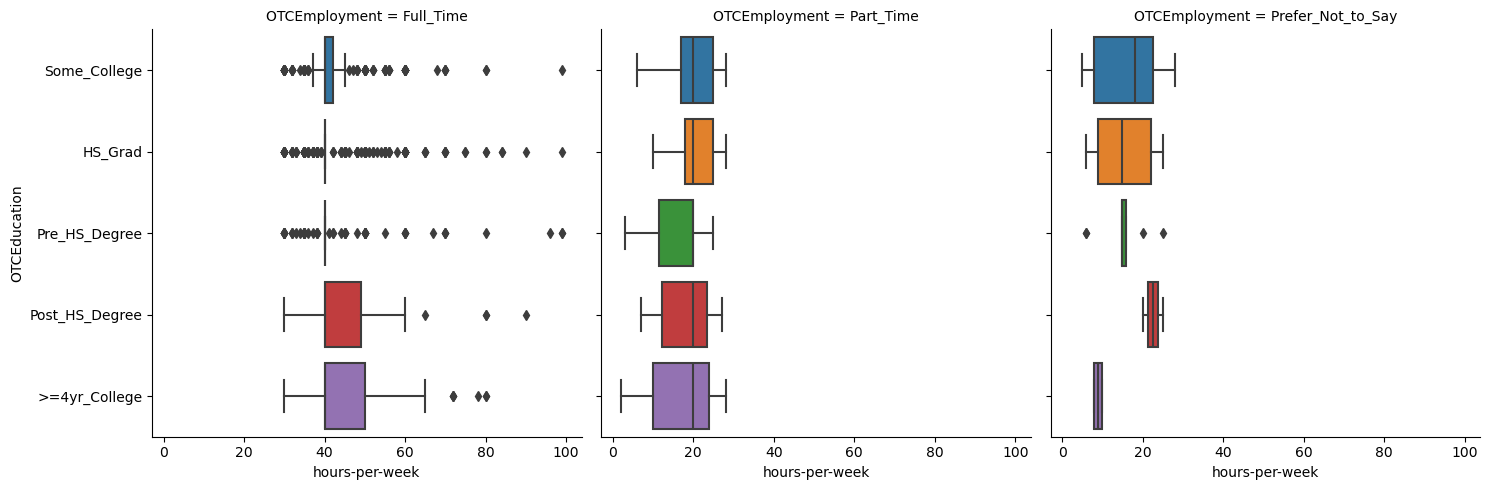

In [27]:
import seaborn as sns
sns.catplot(data=demo_socio,x="hours-per-week",y="OTCEducation",kind="box",col="OTCEmployment")

#Sedentary Workers spend 2/3 of their day sitting
#Percent of day spent standing
#Adm-clerical         20%
#Exec-managerial      10%
#Other-service        70%
#Prof-specialty       40%
#Sales                90% less than 50k, 20% greater than 50
#Craft-repair         60% less than 50K, 20% greater than
#Machine-op-inspct    80%
#?                    70% less than 50K
#Handlers-cleaners     90%
#Tech-support          20%
#Transport-moving      90%
#Protective-serv       90%
#Farming-fishing       40%
#Priv-house-serv       90%
#Armed-Forces           90%

In [28]:
#change ? in Jobtitle to PreferNottoSay

demo_socio.replace({"?":"PreferNotToSay"},inplace=True)

#Set Stand to percentages

condition = [(demo_socio["OTCJobTitle"].isin(["Adm-clerical"]) & demo_socio["OTCIncome"].isin(["<=50k"])),(demo_socio["OTCJobTitle"].isin(["Adm-clerical"]) & demo_socio["OTCIncome"].isin([">50k"])),
             (demo_socio["OTCJobTitle"].isin(["Exec-managerial"]) & demo_socio["OTCIncome"].isin(["<=50k"])),(demo_socio["OTCJobTitle"].isin(["Exec-managerial"]) & demo_socio["OTCIncome"].isin([">50k"])),
             (demo_socio["OTCJobTitle"].isin(["Other-service"])), (demo_socio["OTCJobTitle"].isin(["PreferNotToSay"])),
             (demo_socio["OTCJobTitle"].isin(["Machine-op-inspct"]) & demo_socio["OTCIncome"].isin(["<=50k"])),(demo_socio["OTCJobTitle"].isin(["Machine-op-inspct"]) & demo_socio["OTCIncome"].isin([">50k"])),
             (demo_socio["OTCJobTitle"].isin(["Sales"]) & demo_socio["OTCIncome"].isin(["<=50k"])),(demo_socio["OTCJobTitle"].isin(["Sales"]) & demo_socio["OTCIncome"].isin([">50k"])),
             (demo_socio["OTCJobTitle"].isin(["Protective-serv"]) & demo_socio["OTCIncome"].isin(["<=50k"])),(demo_socio["OTCJobTitle"].isin(["Protective-serv"]) & demo_socio["OTCIncome"].isin([">50k"])),
             (demo_socio["OTCJobTitle"].isin(["Tech-support"]) & demo_socio["OTCIncome"].isin(["<=50k"])),(demo_socio["OTCJobTitle"].isin(["Tech-support"]) & demo_socio["OTCIncome"].isin([">50k"])),
             (demo_socio["OTCJobTitle"].isin(["Handlers-cleaners"])),(demo_socio["OTCJobTitle"].isin(["Priv-house-serv"])),
             (demo_socio["OTCJobTitle"].isin(["Craft-repair"]) & demo_socio["OTCIncome"].isin(["<=50k"])),(demo_socio["OTCJobTitle"].isin(["Craft-repair"]) & demo_socio["OTCIncome"].isin([">50k"])),
             (demo_socio["OTCJobTitle"].isin(["Transport-moving"]) ),(demo_socio["OTCJobTitle"].isin(["Farming-fishing"])),(demo_socio["OTCJobTitle"].isin(["Armed-Forces"])),
             (demo_socio["OTCJobTitle"].isin(["Prof-specialty"]) & demo_socio["OTCIncome"].isin(["<=50k"])),(demo_socio["OTCJobTitle"].isin(["Prof-specialty"]) & demo_socio["OTCIncome"].isin([">50k"]))]

choice = [np.round(demo_socio["hours-per-week"]*0.2,1),0,
          np.round(demo_socio["hours-per-week"]*0.2,1),0,
          np.round(demo_socio["hours-per-week"]*0.7,1),np.round(demo_socio["hours-per-week"]*0.7,1),
          np.round(demo_socio["hours-per-week"]*0.9,1),np.round(demo_socio["hours-per-week"]*0.4,1),
          np.round(demo_socio["hours-per-week"]*0.9,1),np.round(demo_socio["hours-per-week"]*0.2,1),
          np.round(demo_socio["hours-per-week"]*0.9,1),np.round(demo_socio["hours-per-week"]*0.2,1),
          np.round(demo_socio["hours-per-week"]*0.2,1),0,
          np.round(demo_socio["hours-per-week"]*.95,1),np.round(demo_socio["hours-per-week"]*.90,1),
          np.round(demo_socio["hours-per-week"]*0.6,1),np.round(demo_socio["hours-per-week"]*0.2,1),
          np.round(demo_socio["hours-per-week"]*0.9,1),np.round(demo_socio["hours-per-week"]*0.4,1),np.round(demo_socio["hours-per-week"]*0.9,1),
          np.round(demo_socio["hours-per-week"]*0.7,1),0.2]
          
demo_socio["OTCStand"] = np.select(condition,choice)

In [29]:
demo_socio.describe()

,OTCAge,OTCGender,bmi,education-num,hours-per-week,OTCSpanish,OTCStand
count,1845.000000,1845.000000,1845.00000,1845.000000,1845.000000,1845.000000,1845.000000
mean,36.726829,0.500271,29.83958,10.110569,39.210840,0.196206,7.755339
std,13.590548,0.500135,7.34769,2.333785,12.202001,0.397234,13.655021
min,18.000000,0.000000,9.20000,1.000000,2.000000,0.000000,0.000000
25%,25.000000,0.000000,24.64000,9.000000,35.000000,0.000000,0.000000
50%,35.000000,1.000000,29.80000,10.000000,40.000000,0.000000,0.000000
75%,48.000000,1.000000,34.58000,12.000000,40.000000,0.000000,14.000000
max,67.000000,1.000000,61.10000,16.000000,99.000000,1.000000,89.100000


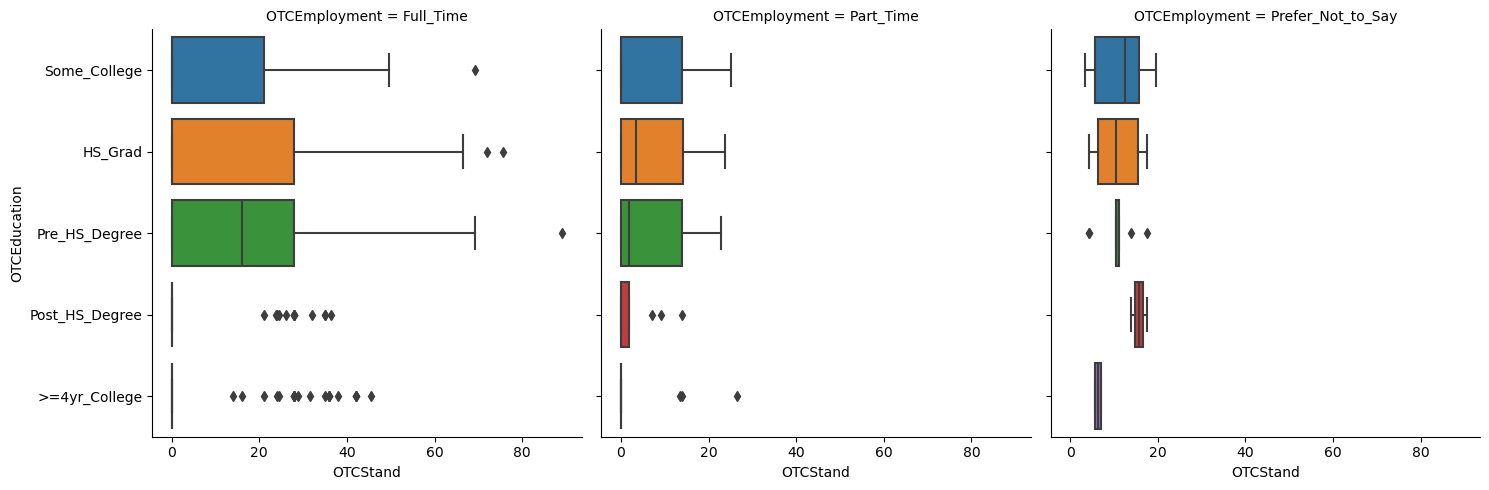

In [30]:
sns.catplot(data=demo_socio,x="OTCStand",y="OTCEducation",kind="box",col="OTCEmployment")

In [31]:
#Convert JobTitle, to JobCategory

conditions = [
    demo_socio["OTCJobTitle"].isin(["Adm-clerical","Exec-managerial","Sales","Tech-support","Prof-specialty"]),
    demo_socio["OTCJobTitle"].isin(["Other-service","PreferNotToSay","Machine-op-inspct","Protective-serv","Armed-Forces",
                                    "Handlers-cleaners","Priv-house-serv","Craft-repair","Transport-moving","Farming-fishing"])]
choice = ["White_Collar", "Blue_Collar"]

demo_socio["OTCJobCategory"] = np.select(conditions,choice)

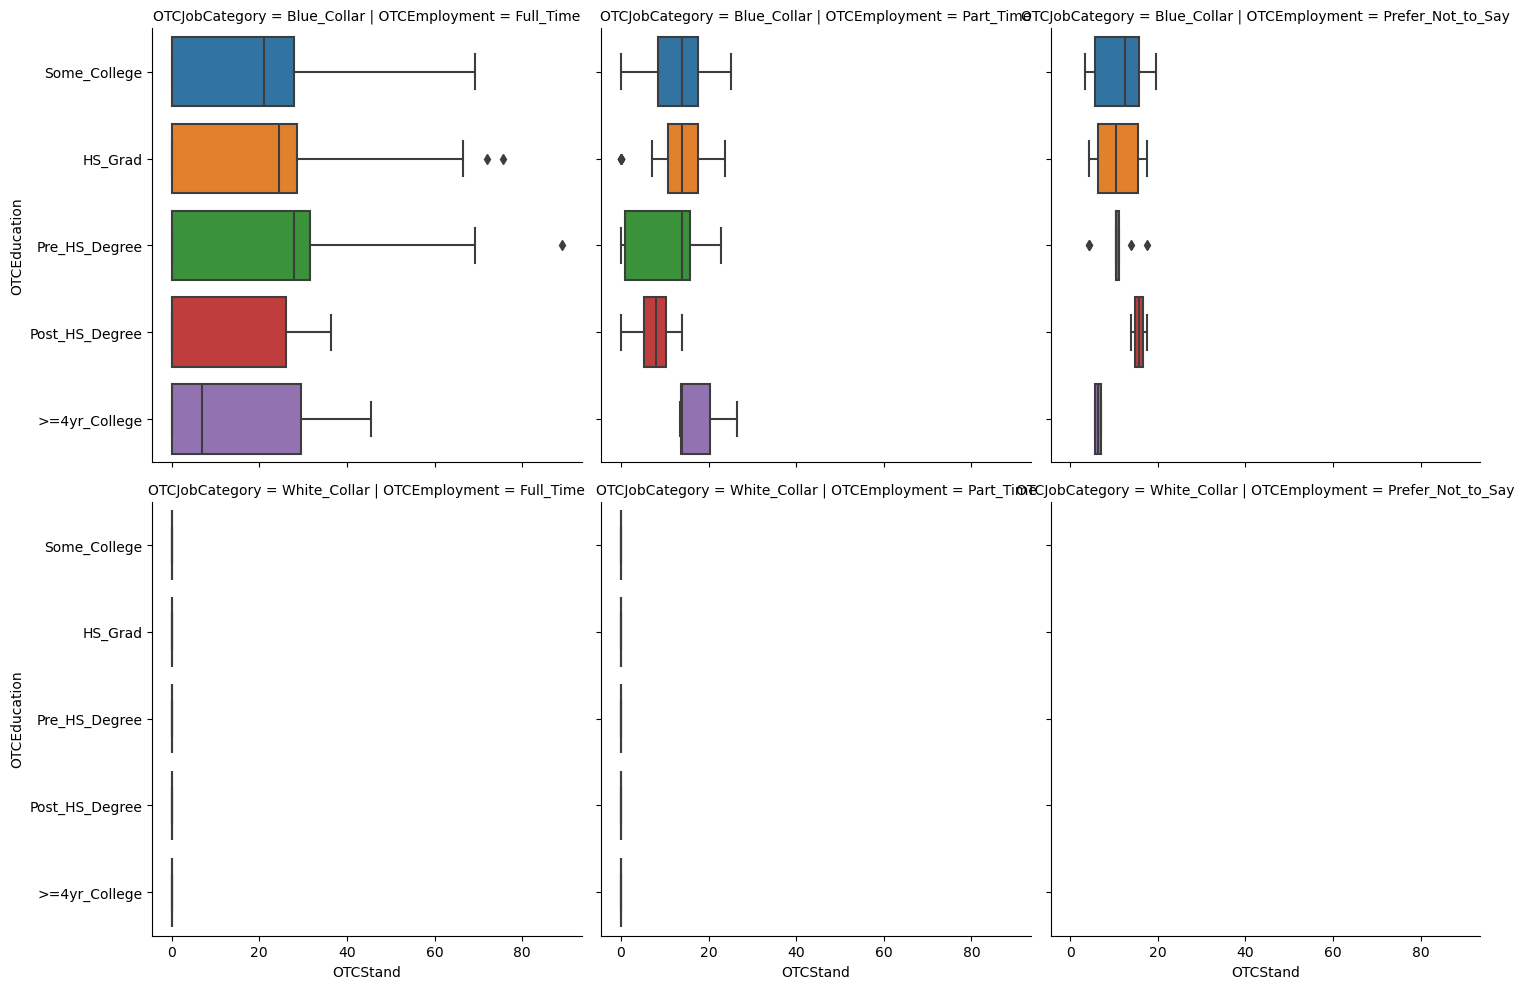

In [32]:
#Test that OTC Stand is different within groups
sns.catplot(data=demo_socio,x="OTCStand",y="OTCEducation",kind="box",col="OTCEmployment",row="OTCJobCategory")
plt.show()

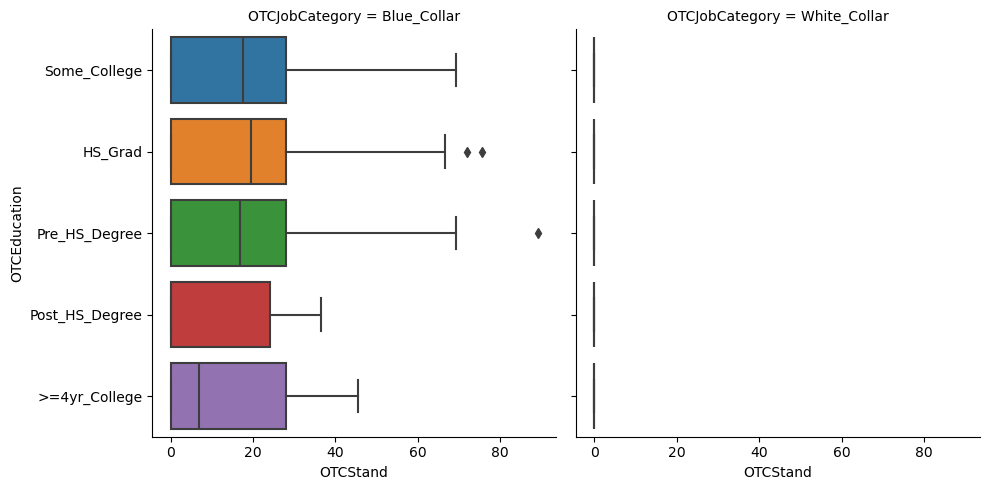

In [33]:
#Test that OTC Stand is different within groups
result = sns.catplot(data=demo_socio,x="OTCStand",y="OTCEducation",kind="box",col="OTCJobCategory")
plt.show()
result.savefig("result.png")

#### OTCEverDoneExcersise

This will be correlated to JobCategory and Race as per this article
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4306423/

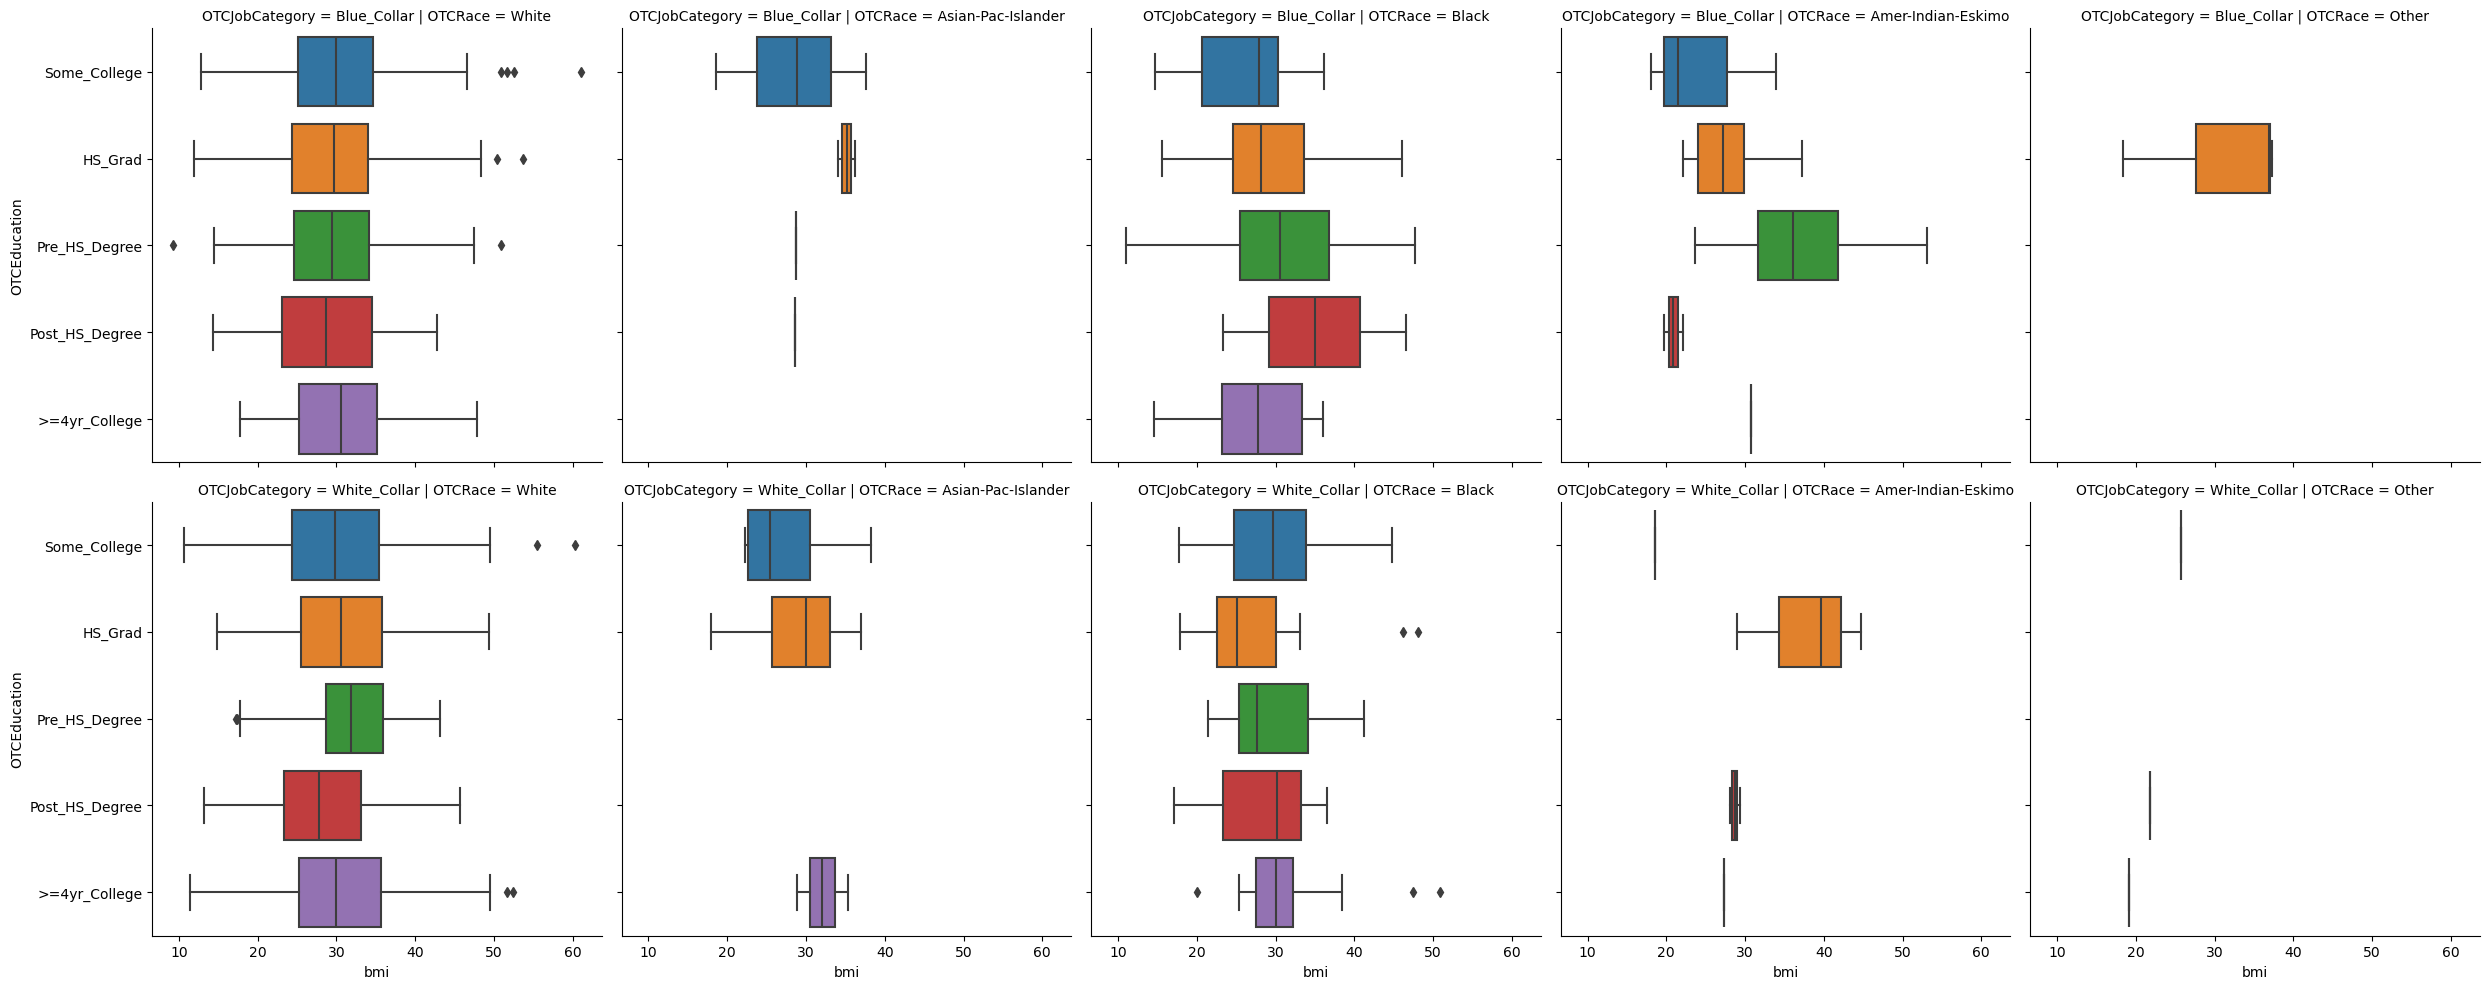

In [34]:
sns.catplot(data=demo_socio,x="bmi",y="OTCEducation",kind="box",col="OTCRace",row="OTCJobCategory")

In [35]:
conditions = [demo_socio["bmi"] < 25,demo_socio["bmi"] >= 25]
choice = ["Yes","No"]
demo_socio["OTCEverDoneExcersise"] = np.select(conditions,choice)

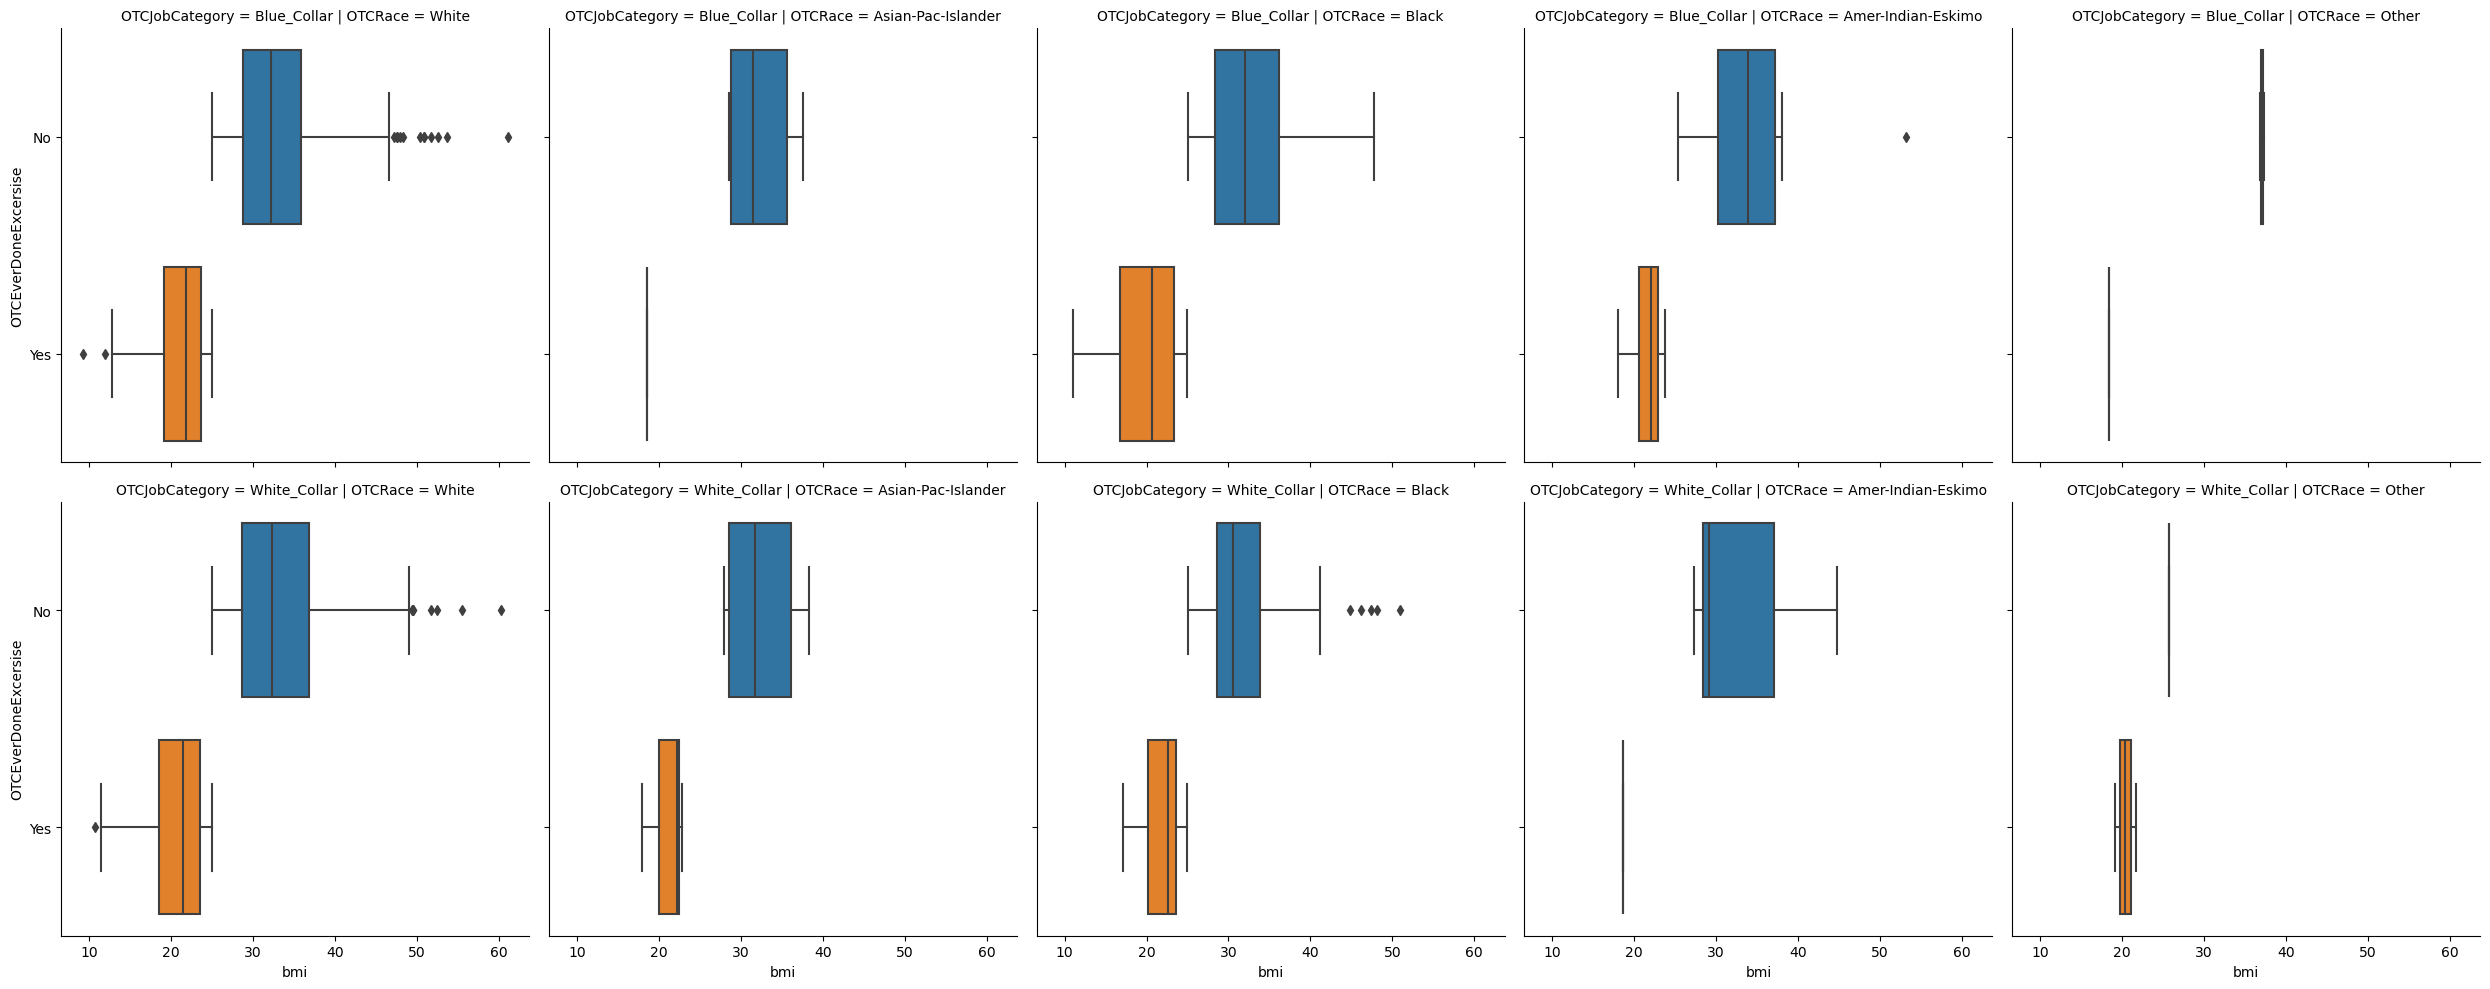

In [36]:
sns.catplot(data=demo_socio,x="bmi",y="OTCEverDoneExcersise",kind="box",col="OTCRace",row="OTCJobCategory")

In [37]:
conditions = [demo_socio["bmi"] < 25,demo_socio["bmi"] >= 25]
choice = [1,0]
demo_socio["OTCEverDoneExcersise"] = np.select(conditions,choice)

In [38]:

#Would this complicate a model? (demo_socio["bmi"] >= 25 & demo_socio["bmi"] < 29.9 & demo_socio["JobCategory"].isin(["White_Collar"]))

### OTCInsurance

Yes - Income greather than 50, White Collar & Full Time
No - Others

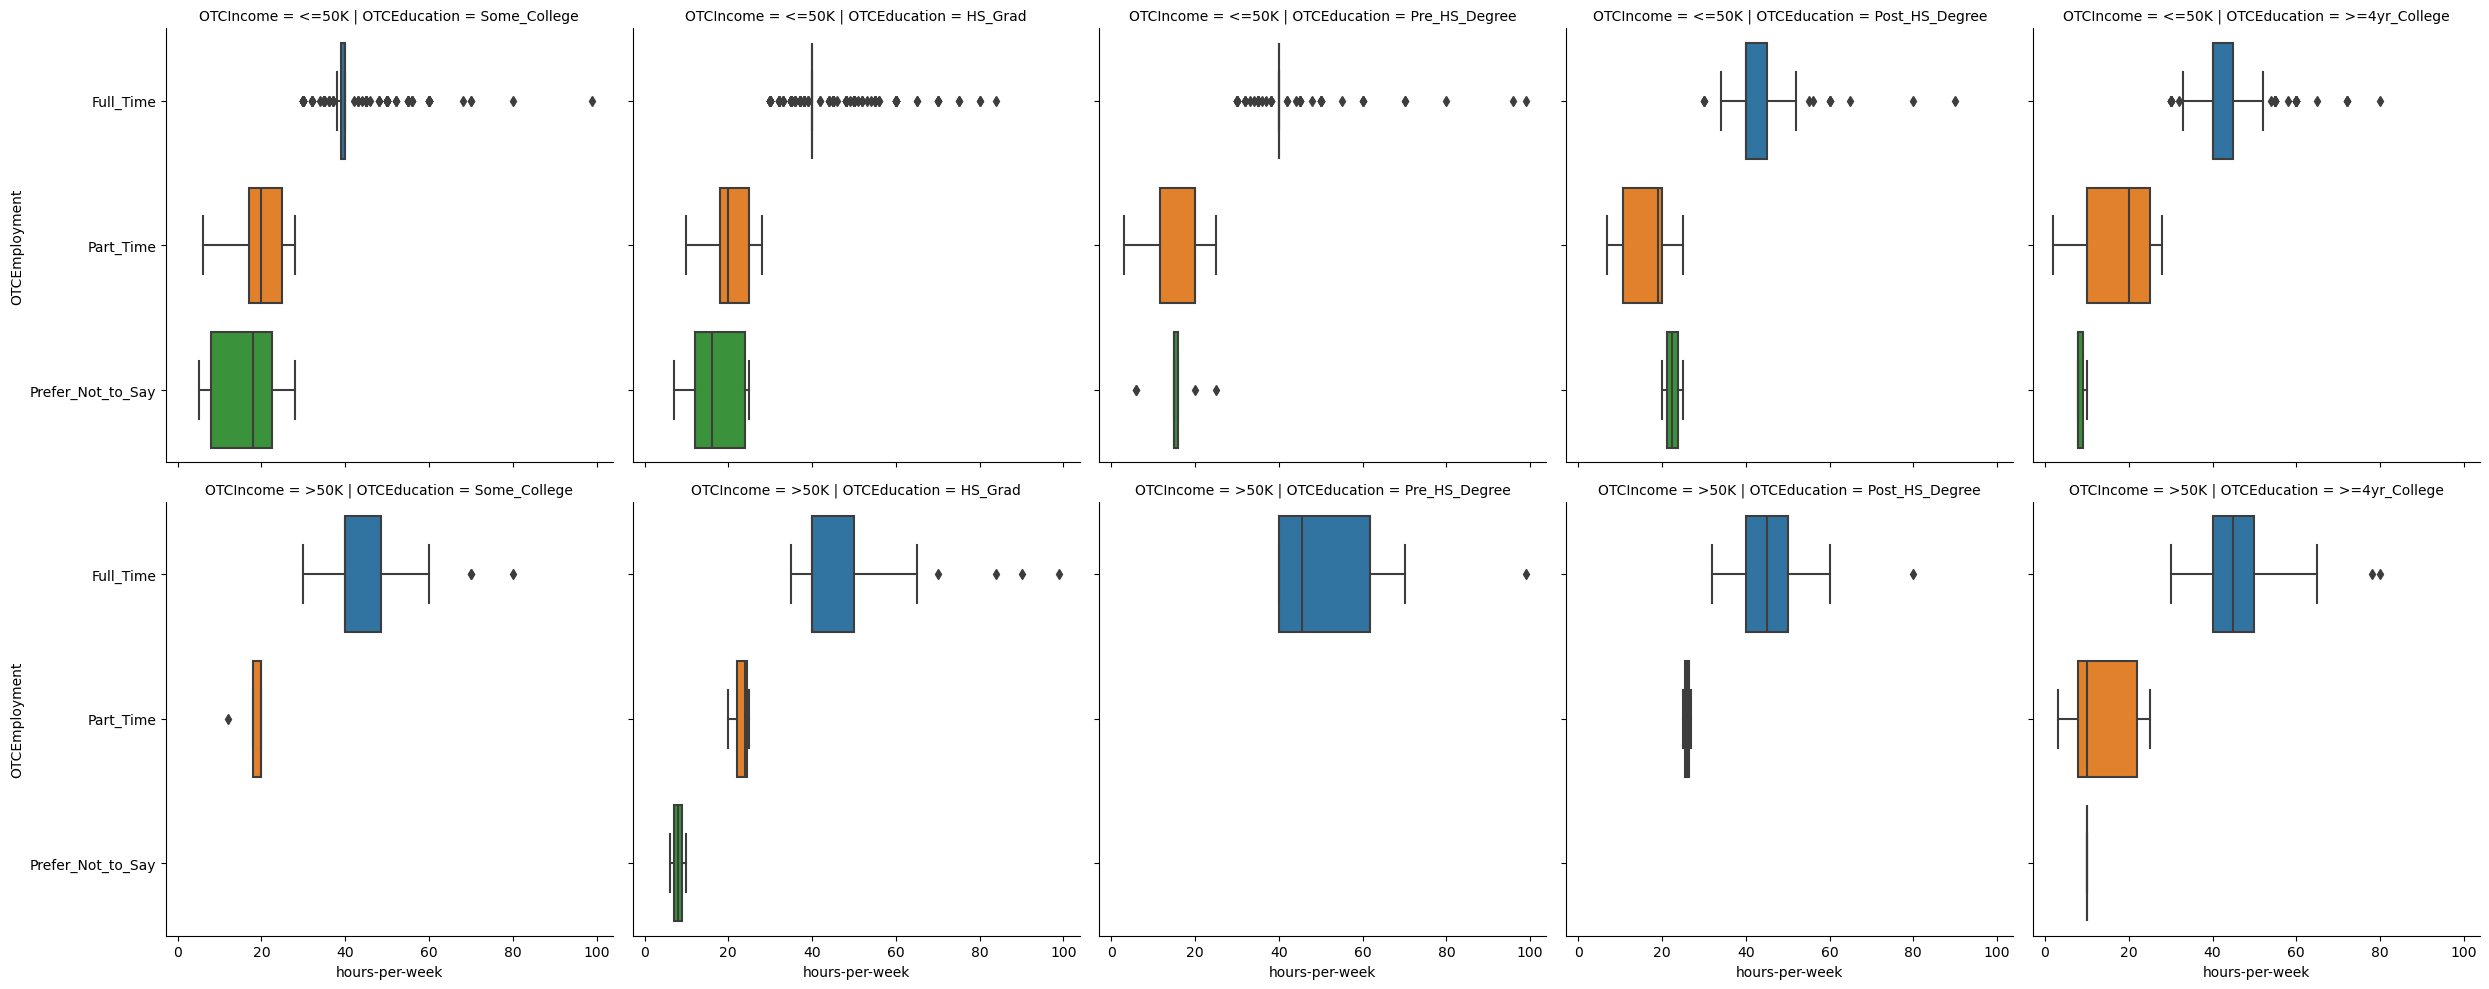

In [39]:
sns.catplot(data=demo_socio,x="hours-per-week",y="OTCEmployment",kind="box",col="OTCEducation",row="OTCIncome")

In [40]:
demo_socio["OTCEmployment"].value_counts()

OTCEmployment
Full_Time            1569
Part_Time             239
Prefer_Not_to_Say      37
Name: count, dtype: int64

In [41]:
condtions = [(demo_socio["OTCJobCategory"].isin(["White_Collar"]) & demo_socio["OTCEmployment"].isin(["Full_Time"])),demo_socio["OTCIncome"].isin([">50K"])]
choice = [1,1]
demo_socio["OTCInsurance"] = np.select(conditions,choice)

In [42]:
demo_socio.describe()

,OTCAge,OTCGender,bmi,education-num,hours-per-week,OTCSpanish,OTCStand,OTCEverDoneExcersise,OTCInsurance
count,1845.000000,1845.000000,1845.00000,1845.000000,1845.000000,1845.000000,1845.000000,1845.000000,1845.0
mean,36.726829,0.500271,29.83958,10.110569,39.210840,0.196206,7.755339,0.263415,1.0
std,13.590548,0.500135,7.34769,2.333785,12.202001,0.397234,13.655021,0.440605,0.0
min,18.000000,0.000000,9.20000,1.000000,2.000000,0.000000,0.000000,0.000000,1.0
25%,25.000000,0.000000,24.64000,9.000000,35.000000,0.000000,0.000000,0.000000,1.0
50%,35.000000,1.000000,29.80000,10.000000,40.000000,0.000000,0.000000,0.000000,1.0
75%,48.000000,1.000000,34.58000,12.000000,40.000000,0.000000,14.000000,1.000000,1.0
max,67.000000,1.000000,61.10000,16.000000,99.000000,1.000000,89.100000,1.000000,1.0


In [43]:
demo_socio.describe(include="O")

,index,OTCRegion,OTCEmployment,OTCEducation,OTCJobTitle,OTCRace,OTCIncome,OTCJobCategory
count,1845,1845,1845,1845,1845,1845,1845,1845
unique,1845,4,3,5,15,5,2,2
top,18_0_1,southeast,Full_Time,HS_Grad,Adm-clerical,White,<=50K,White_Collar
freq,1,487,1569,613,267,1575,1484,994


In [44]:
demo_socio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1845 entries, 0 to 1844
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 1845 non-null   object 
 1   OTCAge                1845 non-null   int64  
 2   OTCGender             1845 non-null   int64  
 3   bmi                   1845 non-null   float64
 4   OTCRegion             1845 non-null   object 
 5   OTCEmployment         1845 non-null   object 
 6   OTCEducation          1845 non-null   object 
 7   education-num         1845 non-null   int64  
 8   OTCJobTitle           1845 non-null   object 
 9   OTCRace               1845 non-null   object 
 10  hours-per-week        1845 non-null   int64  
 11  OTCIncome             1845 non-null   object 
 12  OTCSpanish            1845 non-null   int32  
 13  OTCStand              1845 non-null   float64
 14  OTCJobCategory        1845 non-null   object 
 15  OTCEverDoneExcersise 

### Create Survey Data

### Episodes

In [45]:
#Since 25% of adults are affected by knee pain, leave distribution as is.
np.random.seed(seed=45)
demo_socio["Episodes"] = np.random.choice(["None","1_to_2times","3_to_5times",">5times"],size=r,replace=True)
demo_socio["Episodes"].value_counts()

Episodes
>5times        493
1_to_2times    469
None           466
3_to_5times    417
Name: count, dtype: int64

In [46]:
#for use to keep track of actual knee pain cases
result = demo_socio["Episodes"].value_counts()
cases = result.loc[">5times"]+result.loc["1_to_2times"]+result.loc["3_to_5times"]

### Duration

In [47]:
#Assuming an average of  
mu = 42
std = 3
demo_socio["Duration"] = np.round(np.random.normal(mu,std,r))
#change duration for episodes is 0 to 0
demo_socio["Duration"] = demo_socio["Duration"].mask(demo_socio["Episodes"] == "None", 0)
demo_socio["Duration"].describe()

count    1845.000000
mean       31.396748
std        18.440759
min         0.000000
25%         0.000000
50%        41.000000
75%        43.000000
max        52.000000
Name: Duration, dtype: float64

# OTC 1

#### OTC1Cause
*Step 1*: Calculate BMI, OTCCause1 is distributed for (1:yes, 0:no) <br>
OTCCause1_Choice1 randomly assign<br>
OTCCause1_Choice2 randomly assign <br>
OTCCause1_Choice3 >= 60 <br>
OTCCause1_Choice4 <= 35 <br>
OTCCause1_Choice5 less than 10% <br>
OTCCause1_Choice6 BMI > 25 <br>
OTCCause1_Choice7 0 <br>
OTCCause1_Choice8 0 <br>


In [48]:
#obesity/overweight
condition = [demo_socio["bmi"] < 25,demo_socio["bmi"] >= 25,demo_socio["Episodes"].isin(["None"])]
choice = [0,1,0]
demo_socio["OTC1Cause_Weight"] = np.select(condition,choice)

In [49]:
#aging
condition = [demo_socio["OTCAge"] < 60,demo_socio["OTCAge"] >= 60,demo_socio["Episodes"].isin(["None"])]
choice = [0,1,0]
demo_socio["OTC1Cause_Aging"] = np.select(condition,choice)

In [50]:
#repeated stress due to physical activity, more likely in younger people
condition = [demo_socio["OTCJobCategory"].isin(["White_Collar"]),demo_socio["OTCJobCategory"].isin(["Blue_Collar"]),demo_socio["Episodes"].isin(["None"])]
choice = [0,1,0]
demo_socio["OTC1Cause_RepeatedStress"] = np.select(condition,choice)

In [51]:
#injury - caused by combination of factors
np.random.seed(seed=5)
demo_socio["OTC1Cause_Injury"] = np.random.randint(0,2,size=demo_socio.shape[0])
demo_socio["OTC1Cause_Injury"] = demo_socio["OTC1Cause_Injury"].mask(demo_socio["OTC1Cause_Injury"].isin(["None"]),0) #no episode
demo_socio["OTC1Cause_Injury"].describe()

count    1845.000000
mean        0.505691
std         0.500103
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: OTC1Cause_Injury, dtype: float64

In [52]:
#medical condition
np.random.seed(seed=5)
demo_socio["OTC1Cause_Medical"] = np.random.randint(0,2,size=demo_socio.shape[0])
demo_socio["OTC1Cause_Medical"] = demo_socio["OTC1Cause_Medical"].mask(demo_socio["OTC1Cause_Medical"].isin(["None"]),0) #no episode
demo_socio["OTC1Cause_Medical"].describe()

count    1845.000000
mean        0.505691
std         0.500103
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: OTC1Cause_Medical, dtype: float64

In [53]:
#none of the above and dont know dont have choices
np.random.seed(seed=20)
condition = [~demo_socio["Episodes"].isin(["None"]),demo_socio["Episodes"].isin(["None"])]
choice= [0,1]
df["OTC1Cause_DontKnow"] =np.select(condition, choice)

#### OTC1PrePain

In [54]:
np.random.seed(seed=5)
demo_socio["OTC1PrePain"] = np.random.randint(1,11,size=demo_socio.shape[0])
demo_socio["OTC1PrePain"] = demo_socio["OTC1PrePain"].mask(demo_socio["OTC1PrePain"].isin(["None"]),0) #no episode
demo_socio["OTC1PrePain"].describe()

count    1845.000000
mean        5.325203
std         2.866789
min         1.000000
25%         3.000000
50%         5.000000
75%         8.000000
max        10.000000
Name: OTC1PrePain, dtype: float64

#### OTC1PainLocation

In [55]:
#front of knee
np.random.seed(seed=5)
size = demo_socio.shape[0]
demo_socio["OTC1PainLocation_FrontKnee"] = np.random.choice([0,1],size,replace=True)
demo_socio["OTC1PainLocation_FrontKnee"] = demo_socio["OTC1PainLocation_FrontKnee"].mask(demo_socio["Episodes"].isin(["None"]), 0)

#all knee
np.random.seed(seed=20)
demo_socio["OTC1PainLocation_AllKnee"] = np.random.choice([0,1],size,replace=True)
demo_socio["OTC1PainLocation_AllKnee"] = demo_socio["OTC1PainLocation_AllKnee"].mask(demo_socio["Episodes"].isin(["None"]), 0)

#Surface of knee
np.random.seed(seed=100)
demo_socio["OTC1PainLocation_Surface"] = np.random.choice([0,1],size,replace=True)
demo_socio["OTC1PainLocation_Surface"] = demo_socio["OTC1PainLocation_Surface"].mask(demo_socio["Episodes"].isin(["None"]), 0)

#inside of knee
np.random.seed(seed=200)
demo_socio["OTC1PainLocation_Inside"] = np.random.choice([0,1],size,replace=True)
demo_socio["OTC1PainLocation_Inside"] = demo_socio["OTC1PainLocation_Inside"].mask(demo_socio["Episodes"].isin(["None"]), 0)

#multiple
np.random.seed(seed=400)
demo_socio["OTC1PainLocation_Multiple"] = np.random.choice([0,1],size,replace=True)
demo_socio["OTC1PainLocation_Multiple"] = demo_socio["OTC1PainLocation_FrontKnee"].mask(demo_socio["Episodes"].isin(["None"]), 0)


#### OTC1PainTime

In [56]:
#moving or rest
np.random.seed(seed=400)
demo_socio["OTC1PainTime_MovingOrRest"] = np.random.choice([0,1],size,replace=True)
demo_socio["OTC1PainTime_MovingOrRest"] = demo_socio["OTC1PainTime_MovingOrRest"].mask(demo_socio["Episodes"].isin(["None"]), 0)

#morning
np.random.seed(seed=600)
demo_socio["OTC1PainTime_Morning"] = np.random.choice([0,1],size,replace=True)
demo_socio["OTC1PainTime_Morning"] = demo_socio["OTC1PainTime_Morning"].mask(demo_socio["Episodes"].isin(["None"]), 0)

#night
np.random.seed(seed=800)
demo_socio["OTC1PainTime_Night"] = np.random.choice([0,1],size,replace=True)
demo_socio["OTC1PainTime_Night"] = demo_socio["OTC1PainTime_Night"].mask(demo_socio["Episodes"].isin(["None"]), 0)

#bad weather
np.random.seed(seed=1)
demo_socio["OTC1PainTime_BadWeather"] = np.random.choice([0,1],size,replace=True)
demo_socio["OTC1PainTime_BadWeather"] = demo_socio["OTC1PainTime_BadWeather"].mask(demo_socio["Episodes"].isin(["None"]), 0)

#stress correlate with repeated stress
np.random.seed(seed=8)
demo_socio["OTC1PainTime_Stress"] = np.random.choice([0,1],size,replace=True)
demo_socio["OTC1PainTime_Stress"] = demo_socio["OTC1PainTime_Stress"].mask(demo_socio["Episodes"].isin(["None"]), 0)
demo_socio["OTC1PainTime_Stress"] = demo_socio["OTC1PainTime_Stress"].mask(demo_socio["OTC1Cause_RepeatedStress"]==1, 1)

#unwell correlate with medical cause
np.random.seed(seed=30)
demo_socio["OTC1PainTime_Unwell"] = np.random.choice([0,1],size,replace=True)
demo_socio["OTC1PainTime_Unwell"] = demo_socio["OTC1PainTime_Unwell"].mask(demo_socio["Episodes"].isin(["None"]), 0)
demo_socio["OTC1PainTime_Unwell"] = demo_socio["OTC1PainTime_Unwell"].mask(demo_socio["OTC1Cause_Medical"]==1, 1)

#### OTC1CocomtSymptom

indexes to ensure that it is one.
injury: 10, 8, 1, 3, 4, 5 <br>
medical: 9, 10, 2, 3, 6 <br>
obesity:  not 9<br>

In [57]:
#swelling
demo_socio["OTC1CocomtSymptom_Swelling"] = np.random.choice([0,1],size,replace=True)
demo_socio["OTC1CocomtSymptom_Swelling"] = demo_socio["OTC1CocomtSymptom_Swelling"].mask(demo_socio["OTC1Cause_Injury"] == 1, 1)
demo_socio["OTC1CocomtSymptom_Swelling"] = demo_socio["OTC1CocomtSymptom_Swelling"].mask(demo_socio["OTC1Cause_Weight"] == 1, 1)
demo_socio["OTC1CocomtSymptom_Swelling"] = demo_socio["OTC1CocomtSymptom_Swelling"].mask(demo_socio["Episodes"].isin(["None"]), 0)

#stiffness
demo_socio["OTC1CocomtSymptom_Stiffness"] = np.random.choice([0,1],size,replace=True)
demo_socio["OTC1CocomtSymptom_Stiffness"] = demo_socio["OTC1CocomtSymptom_Stiffness"].mask(demo_socio["OTC1Cause_Medical"] == 1, 1)
demo_socio["OTC1CocomtSymptom_Stiffness"] = demo_socio["OTC1CocomtSymptom_Stiffness"].mask(demo_socio["Episodes"].isin(["None"]), 0)

#redness
demo_socio["OTC1CocomtSymptom_Redness"] = np.random.choice([0,1],size,replace=True)
demo_socio["OTC1CocomtSymptom_Redness"] = demo_socio["OTC1CocomtSymptom_Redness"].mask(demo_socio["OTC1Cause_Injury"] == 1, 1)
demo_socio["OTC1CocomtSymptom_Redness"] = demo_socio["OTC1CocomtSymptom_Redness"].mask(demo_socio["OTC1Cause_RepeatedStress"] == 1, 1)
demo_socio["OTC1CocomtSymptom_Redness"] = demo_socio["OTC1CocomtSymptom_Redness"].mask(demo_socio["Episodes"].isin(["None"]), 0)

#instability
demo_socio["OTC1CocomtSymptom_Instabilty"] = np.random.choice([0,1],size,replace=True)
demo_socio["OTC1CocomtSymptom_Instabilty"] = demo_socio["OTC1CocomtSymptom_Instabilty"].mask(demo_socio["OTC1Cause_Aging"] == 1, 1)
demo_socio["OTC1CocomtSymptom_Instabilty"] = demo_socio["OTC1CocomtSymptom_Instabilty"].mask(demo_socio["OTC1Cause_RepeatedStress"] == 1, 1)
demo_socio["OTC1CocomtSymptom_Instabilty"] = demo_socio["OTC1CocomtSymptom_Instabilty"].mask(demo_socio["Episodes"].isin(["None"]), 0)


#popping
demo_socio["OTC1CocomtSymptom_Popping"] = np.random.choice([0,1],size,replace=True)
demo_socio["OTC1CocomtSymptom_Popping"] = demo_socio["OTC1CocomtSymptom_Popping"].mask(demo_socio["OTC1Cause_Injury"] == 1, 1)
demo_socio["OTC1CocomtSymptom_Popping"] = demo_socio["OTC1CocomtSymptom_Popping"].mask(demo_socio["OTC1Cause_Weight"] == 1, 1)
demo_socio["OTC1CocomtSymptom_Popping"] = demo_socio["OTC1CocomtSymptom_Popping"].mask(demo_socio["Episodes"].isin(["None"]), 0)

#limited range
demo_socio["OTC1CocomtSymptom_LimitedRange"] = np.random.choice([0,1],size,replace=True)
demo_socio["OTC1CocomtSymptom_LimitedRange"] = demo_socio["OTC1CocomtSymptom_LimitedRange"].mask(demo_socio["OTC1Cause_Medical"] == 1, 1)
demo_socio["OTC1CocomtSymptom_LimitedRange"] = demo_socio["OTC1CocomtSymptom_LimitedRange"].mask(demo_socio["OTC1Cause_Aging"] == 1, 1)
demo_socio["OTC1CocomtSymptom_LimitedRange"] = demo_socio["OTC1CocomtSymptom_LimitedRange"].mask(demo_socio["Episodes"].isin(["None"]), 0)

#locked knee
demo_socio["OTC1CocomtSymptom_LockedKnee"] = np.random.choice([0,1],size,replace=True)
demo_socio["OTC1CocomtSymptom_LockedKnee"] = demo_socio["OTC1CocomtSymptom_LockedKnee"].mask(demo_socio["OTC1Cause_Medical"] == 1, 1)
demo_socio["OTC1CocomtSymptom_LockedKnee"] = demo_socio["OTC1CocomtSymptom_LockedKnee"].mask(demo_socio["OTC1Cause_Aging"] == 1, 1)
demo_socio["OTC1CocomtSymptom_LockedKnee"] = demo_socio["OTC1CocomtSymptom_LockedKnee"].mask(demo_socio["Episodes"].isin(["None"]), 0)

#inability to bear weight
demo_socio["OTC1CocomtSymptom_BearWeight"] = np.random.choice([0,1],size,replace=True)
demo_socio["OTC1CocomtSymptom_BearWeight"] = demo_socio["OTC1CocomtSymptom_BearWeight"].mask(demo_socio["OTC1Cause_Injury"] == 1, 1)
demo_socio["OTC1CocomtSymptom_BearWeight"] = demo_socio["OTC1CocomtSymptom_BearWeight"].mask(demo_socio["OTC1Cause_Weight"] == 1, 1)
demo_socio["OTC1CocomtSymptom_BearWeight"] = demo_socio["OTC1CocomtSymptom_BearWeight"].mask(demo_socio["OTC1Cause_Medical"] == 1, 1)
demo_socio["OTC1CocomtSymptom_BearWeight"] = demo_socio["OTC1CocomtSymptom_BearWeight"].mask(demo_socio["Episodes"].isin(["None"]), 0)

#fever
demo_socio["OTC1CocomtSymptom_Fever"] = np.random.choice([0,1],size,replace=True)
demo_socio["OTC1CocomtSymptom_Fever"] = demo_socio["OTC1CocomtSymptom_Fever"].mask(demo_socio["OTC1Cause_Medical"] == 1, 1)
demo_socio["OTC1CocomtSymptom_Fever"] = demo_socio["OTC1CocomtSymptom_Fever"].mask(demo_socio["OTC1Cause_Aging"] == 1, 1)
demo_socio["OTC1CocomtSymptom_Fever"] = demo_socio["OTC1CocomtSymptom_Fever"].mask(demo_socio["Episodes"].isin(["None"]), 0)

#disabling pain
demo_socio["OTC1CocomtSymptom_DisablingPain"] = np.random.choice([0,1],size,replace=True)
demo_socio["OTC1CocomtSymptom_DisablingPain"] = demo_socio["OTC1CocomtSymptom_DisablingPain"].mask(demo_socio["OTC1Cause_Injury"] == 1, 1)
demo_socio["OTC1CocomtSymptom_DisablingPain"] = demo_socio["OTC1CocomtSymptom_DisablingPain"].mask(demo_socio["OTC1Cause_Medical"] == 1, 1)
demo_socio["OTC1CocomtSymptom_DisablingPain"] = demo_socio["OTC1CocomtSymptom_DisablingPain"].mask(demo_socio["Episodes"].isin(["None"]), 0)

#### OTC1Doctor

In [58]:
demo_socio["OTC1Doctor"] = np.random.choice([0,1],size,replace=True)
demo_socio["OTC1Doctor"] = demo_socio["OTC1Doctor"].mask(demo_socio["Episodes"].isin(["None"]), 0)

#### OTC1Prescription

In [59]:
demo_socio["OTC1Prescription"] = np.random.choice([0,1],size,replace=True)
demo_socio["OTC1Prescription"] = demo_socio["OTC1Prescription"].mask(demo_socio["Episodes"].isin(["None"]), 0)
demo_socio["OTC1Prescription"] = demo_socio["OTC1Prescription"].mask(demo_socio["OTC1Doctor"] == 0,0)

#### OTC1Select

#{"NSAID": ["Capzasin", "Aspirin", "Ibruprofen", "Naproxen", "Voltren Gel"],
  "Acetaminophen" : "Acetaminophen(Tylenol)",
  "Anasthetic" : ["Cortex_Daphne", "Tiger_Balm", "Salnopas_Lidocaine","Biofreeze","Zotrix_MaxStrength","Ice_HotCream","Bengay_Cream"],
  "Supplements" : ["Collagen","Glucosamine","Chondroitin","Hyaluronic_Acid","Tumeric","Ginger","MSM"],
  "Device" : ["Massager","Brace","Vibration_Massager","Vibration_HeatMassager","Infrared_HeatMassager","Electric_Stimulator","Ice_Pack","Heating_Pad","Foam_Roller"],
 "No_OTC_Product":"No_OTC_Product"}

In [60]:
#NSAID
selections = ["Capzasin", "Aspirin", "Ibruprofen", "Naproxen", "Voltren Gel","Acetaminophen(Tylenol)",
              "Cortex_Daphne", "Tiger_Balm", "Salnopas_Lidocaine","Biofreeze","Zotrix_MaxStrength","Ice_HotCream","Bengay_Cream",
              "Collagen","Glucosamine","Chondroitin","Hyaluronic_Acid","Tumeric","Ginger","MSM", "Massager","Brace","Vibration_Massager",
              "Vibration_HeatMassager","Infrared_HeatMassager","Electric_Stimulator","Ice_Pack","Heating_Pad","Foam_Roller","No_OTC_Product"]


In [61]:
options = {"NSAID": ["Capzasin", "Aspirin", "Ibruprofen", "Naproxen", "Voltren Gel"],
  "Acetaminophen" : "Acetaminophen(Tylenol)",
  "Anasthetic" : ["Cortex_Daphne", "Tiger_Balm", "Salnopas_Lidocaine","Biofreeze","Zotrix_MaxStrength","Ice_HotCream","Bengay_Cream"],
  "Supplements" : ["Collagen","Glucosamine","Chondroitin","Hyaluronic_Acid","Tumeric","Ginger","MSM"],
  "Device" : ["Massager","Brace","Vibration_Massager","Vibration_HeatMassager","Infrared_HeatMassager","Electric_Stimulator","Ice_Pack","Heating_Pad","Foam_Roller"],
 "No_OTC_Product":"No_OTC_Product"}

In [62]:
#Create Drug Labels

#Get indexes
idx_1 = demo_socio.index[demo_socio["OTC1PrePain"] <= 2]
idx_2 = demo_socio.index[(demo_socio["OTC1PrePain"] > 2) & (demo_socio["OTC1PrePain"] <= 5)]
idx_3 = demo_socio.index[demo_socio["OTC1PrePain"] > 5]


In [63]:
np.random.seed(seed=400)

#Pain less than 2, tylenol and topical
choose = ["Acetaminophen(Tylenol)","Cortex_Daphne", "Tiger_Balm", "Salnopas_Lidocaine","Biofreeze","Zotrix_MaxStrength","Ice_HotCream","Bengay_Cream"]
demo_socio.loc[idx_1,"OTC1Select"] = np.random.choice(choose,idx_1.shape[0],replace=True)

#Prepain between 3 and 5, tylenol, topical, supplement
choose = ["Acetaminophen(Tylenol)","Capzasin", "Aspirin", "Ibruprofen", "Naproxen", "Voltren Gel","Cortex_Daphne", "Tiger_Balm", "Salnopas_Lidocaine","Biofreeze","Zotrix_MaxStrength","Ice_HotCream","Bengay_Cream","Collagen","Glucosamine","Chondroitin","Hyaluronic_Acid","Tumeric","Ginger","MSM"]
demo_socio.loc[idx_2,"OTC1Select"] = np.random.choice(choose,idx_2.shape[0],replace=True)

#Prepain greater than 5, All
choose = ["Capzasin", "Aspirin", "Ibruprofen", "Naproxen", "Voltren Gel","Cortex_Daphne", "Tiger_Balm", "Salnopas_Lidocaine","Biofreeze","Zotrix_MaxStrength","Ice_HotCream","Bengay_Cream","Collagen","Glucosamine","Chondroitin","Hyaluronic_Acid","Tumeric","Ginger","MSM","Massager","Brace","Vibration_Massager","Vibration_HeatMassager","Infrared_HeatMassager","Electric_Stimulator","Ice_Pack","Heating_Pad","Foam_Roller"]
demo_socio.loc[idx_3,"OTC1Select"] = np.random.choice(choose,idx_3.shape[0],replace=True)

demo_socio["OTC1Select"] = demo_socio["OTC1Select"].mask(demo_socio["Episodes"].isin(["None"]), "No_OTC_Product")
demo_socio["OTC1Select"].value_counts()


OTC1Select
No_OTC_Product            466
Cortex_Daphne              96
Biofreeze                  87
Tiger_Balm                 82
Ice_HotCream               81
Bengay_Cream               79
Salnopas_Lidocaine         76
Zotrix_MaxStrength         71
MSM                        57
Ginger                     53
Acetaminophen(Tylenol)     53
Chondroitin                52
Collagen                   47
Tumeric                    47
Voltren Gel                45
Aspirin                    45
Capzasin                   45
Ibruprofen                 39
Hyaluronic_Acid            39
Glucosamine                37
Naproxen                   35
Foam_Roller                28
Electric_Stimulator        26
Ice_Pack                   24
Vibration_Massager         23
Brace                      23
Vibration_HeatMassager     23
Massager                   23
Heating_Pad                22
Infrared_HeatMassager      21
Name: count, dtype: int64

In [64]:
#create pain med according to type - 
#NSAID
demo_socio["OTC1NSAID"] = 0
demo_socio["OTC1NSAID"] = demo_socio["OTC1Select"].mask(demo_socio["OTC1Select"].isin([options["NSAID"]]),1)

#Acetaminophen correlate with obesity, Aging,repeated stress
demo_socio["OTC1Acetaminophen"] = 0
demo_socio["OTC1Acetaminophen"] = demo_socio["OTC1Select"].mask(demo_socio["OTC1Select"].isin([options["Acetaminophen"]]),1)

#Topical obesity, Aging, repeated stress
demo_socio["OTC1Anasthetic"] = 0
demo_socio["OTC1Anasthetic"] = demo_socio["OTC1Select"].mask(demo_socio["OTC1Select"].isin([options["Anasthetic"]]),1)

#Supplement, obesity, Aging,medical,repeated stress
demo_socio["OTC1Supplements"] = 0
demo_socio["OTC1Supplements"] = demo_socio["OTC1Select"].mask(demo_socio["OTC1Select"].isin([options["Supplements"]]),1)

#Device, injury, repeated stress, aging, obesity
demo_socio["OTC1Device"] = 0
demo_socio["OTC1Device"] = demo_socio["OTC1Select"].mask(demo_socio["OTC1Select"].isin([options["Device"]]),1)

#### OTC1UseTime

In [65]:
#Assuming an average of mu and sigma, set general distribution
mu = 3
std = 1
demo_socio["OTC1UseTime"] = np.round(np.random.normal(mu,std,r))
#change duration for episodes is 0 to 0
demo_socio["OTC1UseTime"] = demo_socio["OTC1UseTime"].mask(demo_socio["Episodes"].isin(["None"]), 0)
demo_socio["OTC1UseTime"].describe()

count    1845.000000
mean        2.265583
std         1.588302
min         0.000000
25%         0.000000
50%         3.000000
75%         3.000000
max         6.000000
Name: OTC1UseTime, dtype: float64

In [66]:
#set distribution for cases where it was an injury to longer
idx = demo_socio[demo_socio["OTC1Cause_Injury"] == 1].index
mu = 14
std = 2
demo_socio.loc[idx,"OTC1UseTime"] = np.round(np.random.normal(mu,std,idx.shape[0]))
demo_socio["OTC1UseTime"].describe()

count    1845.000000
mean        8.155556
std         6.110353
min         0.000000
25%         3.000000
50%         9.000000
75%        14.000000
max        21.000000
Name: OTC1UseTime, dtype: float64

#### OTC1UseSameTime

In [67]:
#if prescription is yes, 
np.random.seed(seed=200)
demo_socio["OTC1UseSameTime"] = np.random.choice([0,1],size,replace=True)

#### OTC1PostPain

In [68]:
#Post
np.random.seed(seed=100)
demo_socio["OTC1PostPain"] = np.random.randint(1,11,size=size)
demo_socio["OTC1PostPain"] = demo_socio["OTC1PostPain"].mask(demo_socio["Episodes"].isin(["None"]), 0)                                      
demo_socio["OTC1PostPain"].describe()

count    1845.000000
mean        4.139295
std         3.454162
min         0.000000
25%         0.000000
50%         4.000000
75%         7.000000
max        10.000000
Name: OTC1PostPain, dtype: float64

#### OTC1WhyStop

OTC1WhyStop1: postpain == 1 <br>
OTC1WhyStop2: prepain > postpain <br> 
OTC1WhyStop3: idx not included in 1 <br>
OTC1WhyStop4: idx not included in 1 <br>
OTC1WhyStop5: idx not included in 1 <br>

In [69]:
#no more pain
cond = [demo_socio["OTC1PostPain"] == 0,demo_socio["OTC1PrePain"] < demo_socio["OTC1PostPain"]]
choice = [1, 1]
demo_socio["OTC1WhyStop_NoPain"] = np.select(cond,choice)
demo_socio["OTC1WhyStop_NoPain"].describe()

count    1845.000000
mean        0.598374
std         0.490360
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: OTC1WhyStop_NoPain, dtype: float64

In [70]:
#did not reduce knee pain
cond = [demo_socio["OTC1PrePain"] >= demo_socio["OTC1PostPain"]]
choice = [1]
demo_socio["OTC1WhyStop_ReducePain"] = np.select(cond,choice,0)
demo_socio["OTC1WhyStop_ReducePain"].describe()

count    1845.000000
mean        0.654201
std         0.475757
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: OTC1WhyStop_ReducePain, dtype: float64

In [71]:
#I went to see doctor and reciceved prescription
cond = [demo_socio["OTC1Prescription"] == 1]
choice = [1]
demo_socio["OTC1WhyStop_Prescription"] = np.select(cond,choice,0)
demo_socio["OTC1WhyStop_Prescription"].describe()


count    1845.000000
mean        0.184824
std         0.388260
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: OTC1WhyStop_Prescription, dtype: float64

#The classes not coded
#found another medcine
df["OTC1WhyStop3"] = np.random.choice([0,1],r,replace=True)
cond = [df["OTC1Select"] == 32, df["OTC1PostPain"] == 1]
choice = [0, 0]
df["OTC1WhyStop3"] = np.select(cond,choice,df["OTC1WhyStop3"])
df["OTC1WhyStop3"].describe()

#Other reasons
df["OTC1WhyStop5"] = np.random.choice([0,1],r,replace=True)
cond = [df["OTC1Select"] == 32, df["OTC1PostPain"] == 1]
choice = [0, 0]
df["OTC1WhyStop5"] = np.select(cond,choice,df["OTC1WhyStop5"])
df["OTC1WhyStop5"].describe()

### End OTC1

# OTC 2

In [72]:
 # OTC2

# In[51]:


#obesity/overweight
condition = [demo_socio["bmi"] < 25,demo_socio["bmi"] >= 25,demo_socio["Episodes"].isin(["None"])]
choice = [0,1,0]
demo_socio["OTC2Cause_Weight"] = np.select(condition,choice)


# In[52]:


#aging
condition = [demo_socio["OTCAge"] < 60,demo_socio["OTCAge"] >= 60,demo_socio["Episodes"].isin(["None"])]
choice = [0,1,0]
demo_socio["OTC2Cause_Aging"] = np.select(condition,choice)


# In[53]:


#repeated stress due to physical activity, more likely in younger people
condition = [demo_socio["OTCJobCategory"].isin(["White_Collar"]),demo_socio["OTCJobCategory"].isin(["Blue_Collar"]),demo_socio["Episodes"].isin(["None"])]
choice = [0,1,0]
demo_socio["OTC2Cause_RepeatedStress"] = np.select(condition,choice)


# In[54]:


#injury - caused by combination of factors
np.random.seed(seed=4)
demo_socio["OTC2Cause_Injury"] = np.random.randint(0,2,size=demo_socio.shape[0])
demo_socio["OTC2Cause_Injury"] = demo_socio["OTC2Cause_Injury"].mask(demo_socio["OTC2Cause_Injury"].isin(["None"]),0) #no episode
demo_socio["OTC2Cause_Injury"].describe()


# In[55]:


#medical condition
np.random.seed(seed=60)
demo_socio["OTC2Cause_Medical"] = np.random.randint(0,2,size=demo_socio.shape[0])
demo_socio["OTC2Cause_Medical"] = demo_socio["OTC2Cause_Medical"].mask(demo_socio["OTC2Cause_Medical"].isin(["None"]),0) #no episode
demo_socio["OTC2Cause_Medical"].describe()


# In[56]:


#none of the above and dont know dont have choices
np.random.seed(seed=20)
condition = [~demo_socio["Episodes"].isin(["None"]),demo_socio["Episodes"].isin(["None"])]
choice= [0,1]
df["OTC2Cause_DontKnow"] =np.select(condition, choice)


# #### OTC2PrePain

# In[57]:


np.random.seed(seed=5)
demo_socio["OTC2PrePain"] = np.random.randint(1,11,size=demo_socio.shape[0])
demo_socio["OTC2PrePain"] = demo_socio["OTC2PrePain"].mask(demo_socio["OTC2PrePain"].isin(["None"]),0) #no episode
demo_socio["OTC2PrePain"].describe()


# #### OTC2PainLocation

# In[58]:


#front of knee
np.random.seed(seed=5)
size = demo_socio.shape[0]
demo_socio["OTC2PainLocation_FrontKnee"] = np.random.choice([0,1],size,replace=True)
demo_socio["OTC2PainLocation_FrontKnee"] = demo_socio["OTC2PainLocation_FrontKnee"].mask(demo_socio["Episodes"].isin(["None"]), 0)

#all knee
np.random.seed(seed=10)
demo_socio["OTC2PainLocation_AllKnee"] = np.random.choice([0,1],size,replace=True)
demo_socio["OTC2PainLocation_AllKnee"] = demo_socio["OTC2PainLocation_AllKnee"].mask(demo_socio["Episodes"].isin(["None"]), 0)

#Surface of knee
np.random.seed(seed=1)
demo_socio["OTC2PainLocation_Surface"] = np.random.choice([0,1],size,replace=True)
demo_socio["OTC2PainLocation_Surface"] = demo_socio["OTC2PainLocation_Surface"].mask(demo_socio["Episodes"].isin(["None"]), 0)

#inside of knee
np.random.seed(seed=20)
demo_socio["OTC2PainLocation_Inside"] = np.random.choice([0,1],size,replace=True)
demo_socio["OTC2PainLocation_Inside"] = demo_socio["OTC2PainLocation_Inside"].mask(demo_socio["Episodes"].isin(["None"]), 0)

#multiple
np.random.seed(seed=40)
demo_socio["OTC2PainLocation_Multiple"] = np.random.choice([0,1],size,replace=True)
demo_socio["OTC2PainLocation_Multiple"] = demo_socio["OTC2PainLocation_FrontKnee"].mask(demo_socio["Episodes"].isin(["None"]), 0)


# #### OTC2PainTime

# In[59]:


#moving or rest
np.random.seed(seed=42)
demo_socio["OTC2PainTime_MovingOrRest"] = np.random.choice([0,1],size,replace=True)
demo_socio["OTC2PainTime_MovingOrRest"] = demo_socio["OTC2PainTime_MovingOrRest"].mask(demo_socio["Episodes"].isin(["None"]), 0)

#morning
np.random.seed(seed=600)
demo_socio["OTC2PainTime_Morning"] = np.random.choice([0,1],size,replace=True)
demo_socio["OTC2PainTime_Morning"] = demo_socio["OTC2PainTime_Morning"].mask(demo_socio["Episodes"].isin(["None"]), 0)

#night
np.random.seed(seed=800)
demo_socio["OTC2PainTime_Night"] = np.random.choice([0,1],size,replace=True)
demo_socio["OTC2PainTime_Night"] = demo_socio["OTC2PainTime_Night"].mask(demo_socio["Episodes"].isin(["None"]), 0)

#bad weather
np.random.seed(seed=1)
demo_socio["OTC2PainTime_BadWeather"] = np.random.choice([0,1],size,replace=True)
demo_socio["OTC2PainTime_BadWeather"] = demo_socio["OTC2PainTime_BadWeather"].mask(demo_socio["Episodes"].isin(["None"]), 0)

#stress correlate with repeated stress
np.random.seed(seed=8)
demo_socio["OTC2PainTime_Stress"] = np.random.choice([0,1],size,replace=True)
demo_socio["OTC2PainTime_Stress"] = demo_socio["OTC2PainTime_Stress"].mask(demo_socio["Episodes"].isin(["None"]), 0)
demo_socio["OTC2PainTime_Stress"] = demo_socio["OTC2PainTime_Stress"].mask(demo_socio["OTC2Cause_RepeatedStress"]==1, 1)

#unwell correlate with medical cause
np.random.seed(seed=30)
demo_socio["OTC2PainTime_Unwell"] = np.random.choice([0,1],size,replace=True)
demo_socio["OTC2PainTime_Unwell"] = demo_socio["OTC2PainTime_Unwell"].mask(demo_socio["Episodes"].isin(["None"]), 0)
demo_socio["OTC2PainTime_Unwell"] = demo_socio["OTC2PainTime_Unwell"].mask(demo_socio["OTC2Cause_Medical"]==1, 1)


# #### OTC2CocomtSymptom

# indexes to ensure that it is one.
# injury: 10, 8, 1, 3, 4, 5 <br>
# medical: 9, 10, 2, 3, 6 <br>
# obesity:  not 9<br>

# In[60]:


#swelling
demo_socio["OTC2CocomtSymptom_Swelling"] = np.random.choice([0,1],size,replace=True)
demo_socio["OTC2CocomtSymptom_Swelling"] = demo_socio["OTC2CocomtSymptom_Swelling"].mask(demo_socio["OTC2Cause_Injury"] == 1, 1)
demo_socio["OTC2CocomtSymptom_Swelling"] = demo_socio["OTC2CocomtSymptom_Swelling"].mask(demo_socio["OTC2Cause_Weight"] == 1, 1)
demo_socio["OTC2CocomtSymptom_Swelling"] = demo_socio["OTC2CocomtSymptom_Swelling"].mask(demo_socio["Episodes"].isin(["None"]), 0)

#stiffness
demo_socio["OTC2CocomtSymptom_Stiffness"] = np.random.choice([0,1],size,replace=True)
demo_socio["OTC2CocomtSymptom_Stiffness"] = demo_socio["OTC2CocomtSymptom_Stiffness"].mask(demo_socio["OTC2Cause_Medical"] == 1, 1)
demo_socio["OTC2CocomtSymptom_Stiffness"] = demo_socio["OTC2CocomtSymptom_Stiffness"].mask(demo_socio["Episodes"].isin(["None"]), 0)

#redness
demo_socio["OTC2CocomtSymptom_Redness"] = np.random.choice([0,1],size,replace=True)
demo_socio["OTC2CocomtSymptom_Redness"] = demo_socio["OTC2CocomtSymptom_Redness"].mask(demo_socio["OTC2Cause_Injury"] == 1, 1)
demo_socio["OTC2CocomtSymptom_Redness"] = demo_socio["OTC2CocomtSymptom_Redness"].mask(demo_socio["OTC2Cause_RepeatedStress"] == 1, 1)
demo_socio["OTC2CocomtSymptom_Redness"] = demo_socio["OTC2CocomtSymptom_Redness"].mask(demo_socio["Episodes"].isin(["None"]), 0)

#instability
demo_socio["OTC2CocomtSymptom_Instabilty"] = np.random.choice([0,1],size,replace=True)
demo_socio["OTC2CocomtSymptom_Instabilty"] = demo_socio["OTC2CocomtSymptom_Instabilty"].mask(demo_socio["OTC2Cause_Aging"] == 1, 1)
demo_socio["OTC2CocomtSymptom_Instabilty"] = demo_socio["OTC2CocomtSymptom_Instabilty"].mask(demo_socio["OTC2Cause_RepeatedStress"] == 1, 1)
demo_socio["OTC2CocomtSymptom_Instabilty"] = demo_socio["OTC2CocomtSymptom_Instabilty"].mask(demo_socio["Episodes"].isin(["None"]), 0)


#popping
demo_socio["OTC2CocomtSymptom_Popping"] = np.random.choice([0,1],size,replace=True)
demo_socio["OTC2CocomtSymptom_Popping"] = demo_socio["OTC2CocomtSymptom_Popping"].mask(demo_socio["OTC2Cause_Injury"] == 1, 1)
demo_socio["OTC2CocomtSymptom_Popping"] = demo_socio["OTC2CocomtSymptom_Popping"].mask(demo_socio["OTC2Cause_Weight"] == 1, 1)
demo_socio["OTC2CocomtSymptom_Popping"] = demo_socio["OTC2CocomtSymptom_Popping"].mask(demo_socio["Episodes"].isin(["None"]), 0)

#limited range
demo_socio["OTC2CocomtSymptom_LimitedRange"] = np.random.choice([0,1],size,replace=True)
demo_socio["OTC2CocomtSymptom_LimitedRange"] = demo_socio["OTC2CocomtSymptom_LimitedRange"].mask(demo_socio["OTC2Cause_Medical"] == 1, 1)
demo_socio["OTC2CocomtSymptom_LimitedRange"] = demo_socio["OTC2CocomtSymptom_LimitedRange"].mask(demo_socio["OTC2Cause_Aging"] == 1, 1)
demo_socio["OTC2CocomtSymptom_LimitedRange"] = demo_socio["OTC2CocomtSymptom_LimitedRange"].mask(demo_socio["Episodes"].isin(["None"]), 0)

#locked knee
demo_socio["OTC2CocomtSymptom_LockedKnee"] = np.random.choice([0,1],size,replace=True)
demo_socio["OTC2CocomtSymptom_LockedKnee"] = demo_socio["OTC2CocomtSymptom_LockedKnee"].mask(demo_socio["OTC2Cause_Medical"] == 1, 1)
demo_socio["OTC2CocomtSymptom_LockedKnee"] = demo_socio["OTC2CocomtSymptom_LockedKnee"].mask(demo_socio["OTC2Cause_Aging"] == 1, 1)
demo_socio["OTC2CocomtSymptom_LockedKnee"] = demo_socio["OTC2CocomtSymptom_LockedKnee"].mask(demo_socio["Episodes"].isin(["None"]), 0)

#inability to bear weight
demo_socio["OTC2CocomtSymptom_BearWeight"] = np.random.choice([0,1],size,replace=True)
demo_socio["OTC2CocomtSymptom_BearWeight"] = demo_socio["OTC2CocomtSymptom_BearWeight"].mask(demo_socio["OTC2Cause_Injury"] == 1, 1)
demo_socio["OTC2CocomtSymptom_BearWeight"] = demo_socio["OTC2CocomtSymptom_BearWeight"].mask(demo_socio["OTC2Cause_Weight"] == 1, 1)
demo_socio["OTC2CocomtSymptom_BearWeight"] = demo_socio["OTC2CocomtSymptom_BearWeight"].mask(demo_socio["OTC2Cause_Medical"] == 1, 1)
demo_socio["OTC2CocomtSymptom_BearWeight"] = demo_socio["OTC2CocomtSymptom_BearWeight"].mask(demo_socio["Episodes"].isin(["None"]), 0)

#fever
demo_socio["OTC2CocomtSymptom_Fever"] = np.random.choice([0,1],size,replace=True)
demo_socio["OTC2CocomtSymptom_Fever"] = demo_socio["OTC2CocomtSymptom_Fever"].mask(demo_socio["OTC2Cause_Medical"] == 1, 1)
demo_socio["OTC2CocomtSymptom_Fever"] = demo_socio["OTC2CocomtSymptom_Fever"].mask(demo_socio["OTC2Cause_Aging"] == 1, 1)
demo_socio["OTC2CocomtSymptom_Fever"] = demo_socio["OTC2CocomtSymptom_Fever"].mask(demo_socio["Episodes"].isin(["None"]), 0)

#disabling pain
demo_socio["OTC2CocomtSymptom_DisablingPain"] = np.random.choice([0,1],size,replace=True)
demo_socio["OTC2CocomtSymptom_DisablingPain"] = demo_socio["OTC2CocomtSymptom_DisablingPain"].mask(demo_socio["OTC2Cause_Injury"] == 1, 1)
demo_socio["OTC2CocomtSymptom_DisablingPain"] = demo_socio["OTC2CocomtSymptom_DisablingPain"].mask(demo_socio["OTC2Cause_Medical"] == 1, 1)
demo_socio["OTC2CocomtSymptom_DisablingPain"] = demo_socio["OTC2CocomtSymptom_DisablingPain"].mask(demo_socio["Episodes"].isin(["None"]), 0)


# #### OTC2Doctor

# In[61]:


demo_socio["OTC2Doctor"] = np.random.choice([0,1],size,replace=True)
demo_socio["OTC2Doctor"] = demo_socio["OTC2Doctor"].mask(demo_socio["Episodes"].isin(["None"]), 0)


# #### OTC2Prescription

# In[62]:


demo_socio["OTC2Prescription"] = np.random.choice([0,1],size,replace=True)
demo_socio["OTC2Prescription"] = demo_socio["OTC2Prescription"].mask(demo_socio["Episodes"].isin(["None"]), 0)
demo_socio["OTC2Prescription"] = demo_socio["OTC2Prescription"].mask(demo_socio["OTC2Doctor"] == 0,0)


# #### OTC2Select

# #{"NSAID": ["Capzasin", "Aspirin", "Ibruprofen", "Naproxen", "Voltren Gel"],
#   "Acetaminophen" : "Acetaminophen(Tylenol)",
#   "Anasthetic" : ["Cortex_Daphne", "Tiger_Balm", "Salnopas_Lidocaine","Biofreeze","Zotrix_MaxStrength","Ice_HotCream","Bengay_Cream"],
#   "Supplements" : ["Collagen","Glucosamine","Chondroitin","Hyaluronic_Acid","Tumeric","Ginger","MSM"],
#   "Device" : ["Massager","Brace","Vibration_Massager","Vibration_HeatMassager","Infrared_HeatMassager","Electric_Stimulator","Ice_Pack","Heating_Pad","Foam_Roller"],
#  "No_OTC_Product":"No_OTC_Product"}

# In[70]:


#NSAID
selections = ["Capzasin", "Aspirin", "Ibruprofen", "Naproxen", "Voltren Gel","Acetaminophen(Tylenol)",
              "Cortex_Daphne", "Tiger_Balm", "Salnopas_Lidocaine","Biofreeze","Zotrix_MaxStrength","Ice_HotCream","Bengay_Cream",
              "Collagen","Glucosamine","Chondroitin","Hyaluronic_Acid","Tumeric","Ginger","MSM", "Massager","Brace","Vibration_Massager",
              "Vibration_HeatMassager","Infrared_HeatMassager","Electric_Stimulator","Ice_Pack","Heating_Pad","Foam_Roller","No_OTC_Product"]


# In[95]:


options = {"NSAID": ["Capzasin", "Aspirin", "Ibruprofen", "Naproxen", "Voltren Gel"],
  "Acetaminophen" : "Acetaminophen(Tylenol)",
  "Anasthetic" : ["Cortex_Daphne", "Tiger_Balm", "Salnopas_Lidocaine","Biofreeze","Zotrix_MaxStrength","Ice_HotCream","Bengay_Cream"],
  "Supplements" : ["Collagen","Glucosamine","Chondroitin","Hyaluronic_Acid","Tumeric","Ginger","MSM"],
  "Device" : ["Massager","Brace","Vibration_Massager","Vibration_HeatMassager","Infrared_HeatMassager","Electric_Stimulator","Ice_Pack","Heating_Pad","Foam_Roller"],
 "No_OTC_Product":"No_OTC_Product"}


# In[84]:


#Create Drug Labels

#Get indexes
idx_1 = demo_socio.index[demo_socio["OTC2PrePain"] <= 2]
idx_2 = demo_socio.index[(demo_socio["OTC2PrePain"] > 2) & (demo_socio["OTC2PrePain"] <= 5)]
idx_3 = demo_socio.index[demo_socio["OTC2PrePain"] > 5]


# In[103]:


np.random.seed(seed=400)

#Pain less than 2, tylenol and topical
choose = ["Acetaminophen(Tylenol)","Cortex_Daphne", "Tiger_Balm", "Salnopas_Lidocaine","Biofreeze","Zotrix_MaxStrength","Ice_HotCream","Bengay_Cream"]
demo_socio.loc[idx_1,"OTC2Select"] = np.random.choice(choose,idx_1.shape[0],replace=True)

#Prepain between 3 and 5, tylenol, topical, supplement
choose = ["Acetaminophen(Tylenol)","Capzasin", "Aspirin", "Ibruprofen", "Naproxen", "Voltren Gel","Cortex_Daphne", "Tiger_Balm", "Salnopas_Lidocaine","Biofreeze","Zotrix_MaxStrength","Ice_HotCream","Bengay_Cream","Collagen","Glucosamine","Chondroitin","Hyaluronic_Acid","Tumeric","Ginger","MSM"]
demo_socio.loc[idx_2,"OTC2Select"] = np.random.choice(choose,idx_2.shape[0],replace=True)

#Prepain greater than 5, All
choose = ["Capzasin", "Aspirin", "Ibruprofen", "Naproxen", "Voltren Gel","Cortex_Daphne", "Tiger_Balm", "Salnopas_Lidocaine","Biofreeze","Zotrix_MaxStrength","Ice_HotCream","Bengay_Cream","Collagen","Glucosamine","Chondroitin","Hyaluronic_Acid","Tumeric","Ginger","MSM","Massager","Brace","Vibration_Massager","Vibration_HeatMassager","Infrared_HeatMassager","Electric_Stimulator","Ice_Pack","Heating_Pad","Foam_Roller"]
demo_socio.loc[idx_3,"OTC2Select"] = np.random.choice(choose,idx_3.shape[0],replace=True)

demo_socio["OTC2Select"] = demo_socio["OTC2Select"].mask(demo_socio["Episodes"].isin(["None"]), "No_OTC_Product")
demo_socio["OTC2Select"].value_counts()


# In[112]:





# In[113]:


#create pain med according to type - 
#NSAID
demo_socio["OTC2NSAID"] = 0
demo_socio["OTC2NSAID"] = demo_socio["OTC2Select"].mask(demo_socio["OTC2Select"].isin([options["NSAID"]]),1)

#Acetaminophen correlate with obesity, Aging,repeated stress
demo_socio["OTC2Acetaminophen"] = 0
demo_socio["OTC2Acetaminophen"] = demo_socio["OTC2Select"].mask(demo_socio["OTC2Select"].isin([options["Acetaminophen"]]),1)

#Topical obesity, Aging, repeated stress
demo_socio["OTC2Anasthetic"] = 0
demo_socio["OTC2Anasthetic"] = demo_socio["OTC2Select"].mask(demo_socio["OTC2Select"].isin([options["Anasthetic"]]),1)

#Supplement, obesity, Aging,medical,repeated stress
demo_socio["OTC2Supplements"] = 0
demo_socio["OTC2Supplements"] = demo_socio["OTC2Select"].mask(demo_socio["OTC2Select"].isin([options["Supplements"]]),1)

#Device, injury, repeated stress, aging, obesity
demo_socio["OTC2Device"] = 0
demo_socio["OTC2Device"] = demo_socio["OTC2Select"].mask(demo_socio["OTC2Select"].isin([options["Device"]]),1)


# #### OTC2UseTime

# In[115]:


#Assuming an average of mu and sigma, set general distribution
mu = 3
std = 1
demo_socio["OTC2UseTime"] = np.round(np.random.normal(mu,std,r))
#change duration for episodes is 0 to 0
demo_socio["OTC2UseTime"] = demo_socio["OTC2UseTime"].mask(demo_socio["Episodes"].isin(["None"]), 0)
demo_socio["OTC2UseTime"].describe()


# In[118]:


#set distribution for cases where it was an injury to longer
idx = demo_socio[demo_socio["OTC2Cause_Injury"] == 1].index
mu = 14
std = 2
demo_socio.loc[idx,"OTC2UseTime"] = np.round(np.random.normal(mu,std,idx.shape[0]))
demo_socio["OTC2UseTime"].describe()


# #### OTC2UseSameTime

# In[119]:


#if prescription is yes, 
np.random.seed(seed=200)
demo_socio["OTC2UseSameTime"] = np.random.choice([0,1],size,replace=True)


# #### OTC2PostPain

# In[121]:


#Post
np.random.seed(seed=100)
demo_socio["OTC2PostPain"] = np.random.randint(1,11,size=size)
demo_socio["OTC2PostPain"] = demo_socio["OTC2PostPain"].mask(demo_socio["Episodes"].isin(["None"]), 0)                                      
demo_socio["OTC2PostPain"].describe()


# #### OTC2WhyStop

# OTC2WhyStop1: postpain == 1 <br>
# OTC2WhyStop2: prepain > postpain <br> 
# OTC2WhyStop3: idx not included in 1 <br>
# OTC2WhyStop4: idx not included in 1 <br>
# OTC2WhyStop5: idx not included in 1 <br>

# In[127]:


#no more pain
cond = [demo_socio["OTC2PostPain"] == 0,demo_socio["OTC2PrePain"] < demo_socio["OTC2PostPain"]]
choice = [1, 1]
demo_socio["OTC2WhyStop_NoPain"] = np.select(cond,choice)
demo_socio["OTC2WhyStop_NoPain"].describe()


# In[128]:


#did not reduce knee pain
cond = [demo_socio["OTC2PrePain"] >= demo_socio["OTC2PostPain"]]
choice = [1]
demo_socio["OTC2WhyStop_ReducePain"] = np.select(cond,choice,0)
demo_socio["OTC2WhyStop_ReducePain"].describe()


# In[129]:


#I went to see doctor and reciceved prescription
cond = [demo_socio["OTC2Prescription"] == 1]
choice = [1]
demo_socio["OTC2WhyStop_Prescription"] = np.select(cond,choice,0)
demo_socio["OTC2WhyStop_Prescription"].describe()


count    1845.000000
mean        0.184824
std         0.388260
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: OTC2WhyStop_Prescription, dtype: float64

# OTC3

In [73]:
# # OTC3

# In[51]:


#obesity/overweight
condition = [demo_socio["bmi"] < 25,demo_socio["bmi"] >= 25,demo_socio["Episodes"].isin(["None"])]
choice = [0,1,0]
demo_socio["OTC3Cause_Weight"] = np.select(condition,choice)


# In[52]:


#aging
condition = [demo_socio["OTCAge"] < 60,demo_socio["OTCAge"] >= 60,demo_socio["Episodes"].isin(["None"])]
choice = [0,1,0]
demo_socio["OTC3Cause_Aging"] = np.select(condition,choice)


# In[53]:


#repeated stress due to physical activity, more likely in younger people
condition = [demo_socio["OTCJobCategory"].isin(["White_Collar"]),demo_socio["OTCJobCategory"].isin(["Blue_Collar"]),demo_socio["Episodes"].isin(["None"])]
choice = [0,1,0]
demo_socio["OTC3Cause_RepeatedStress"] = np.select(condition,choice)


# In[54]:


#injury - caused by combination of factors
np.random.seed(seed=4)
demo_socio["OTC3Cause_Injury"] = np.random.randint(0,2,size=demo_socio.shape[0])
demo_socio["OTC3Cause_Injury"] = demo_socio["OTC3Cause_Injury"].mask(demo_socio["OTC3Cause_Injury"].isin(["None"]),0) #no episode
demo_socio["OTC3Cause_Injury"].describe()


# In[55]:


#medical condition
np.random.seed(seed=60)
demo_socio["OTC3Cause_Medical"] = np.random.randint(0,2,size=demo_socio.shape[0])
demo_socio["OTC3Cause_Medical"] = demo_socio["OTC3Cause_Medical"].mask(demo_socio["OTC3Cause_Medical"].isin(["None"]),0) #no episode
demo_socio["OTC3Cause_Medical"].describe()


# In[56]:


#none of the above and dont know dont have choices
np.random.seed(seed=20)
condition = [~demo_socio["Episodes"].isin(["None"]),demo_socio["Episodes"].isin(["None"])]
choice= [0,1]
df["OTC3Cause_DontKnow"] =np.select(condition, choice)


# #### OTC3PrePain

# In[57]:


np.random.seed(seed=5)
demo_socio["OTC3PrePain"] = np.random.randint(1,11,size=demo_socio.shape[0])
demo_socio["OTC3PrePain"] = demo_socio["OTC3PrePain"].mask(demo_socio["OTC3PrePain"].isin(["None"]),0) #no episode
demo_socio["OTC3PrePain"].describe()


# #### OTC3PainLocation

# In[58]:


#front of knee
np.random.seed(seed=5)
size = demo_socio.shape[0]
demo_socio["OTC3PainLocation_FrontKnee"] = np.random.choice([0,1],size,replace=True)
demo_socio["OTC3PainLocation_FrontKnee"] = demo_socio["OTC3PainLocation_FrontKnee"].mask(demo_socio["Episodes"].isin(["None"]), 0)

#all knee
np.random.seed(seed=10)
demo_socio["OTC3PainLocation_AllKnee"] = np.random.choice([0,1],size,replace=True)
demo_socio["OTC3PainLocation_AllKnee"] = demo_socio["OTC3PainLocation_AllKnee"].mask(demo_socio["Episodes"].isin(["None"]), 0)

#Surface of knee
np.random.seed(seed=1)
demo_socio["OTC3PainLocation_Surface"] = np.random.choice([0,1],size,replace=True)
demo_socio["OTC3PainLocation_Surface"] = demo_socio["OTC3PainLocation_Surface"].mask(demo_socio["Episodes"].isin(["None"]), 0)

#inside of knee
np.random.seed(seed=20)
demo_socio["OTC3PainLocation_Inside"] = np.random.choice([0,1],size,replace=True)
demo_socio["OTC3PainLocation_Inside"] = demo_socio["OTC3PainLocation_Inside"].mask(demo_socio["Episodes"].isin(["None"]), 0)

#multiple
np.random.seed(seed=40)
demo_socio["OTC3PainLocation_Multiple"] = np.random.choice([0,1],size,replace=True)
demo_socio["OTC3PainLocation_Multiple"] = demo_socio["OTC3PainLocation_FrontKnee"].mask(demo_socio["Episodes"].isin(["None"]), 0)


# #### OTC3PainTime

# In[59]:


#moving or rest
np.random.seed(seed=42)
demo_socio["OTC3PainTime_MovingOrRest"] = np.random.choice([0,1],size,replace=True)
demo_socio["OTC3PainTime_MovingOrRest"] = demo_socio["OTC3PainTime_MovingOrRest"].mask(demo_socio["Episodes"].isin(["None"]), 0)

#morning
np.random.seed(seed=600)
demo_socio["OTC3PainTime_Morning"] = np.random.choice([0,1],size,replace=True)
demo_socio["OTC3PainTime_Morning"] = demo_socio["OTC3PainTime_Morning"].mask(demo_socio["Episodes"].isin(["None"]), 0)

#night
np.random.seed(seed=800)
demo_socio["OTC3PainTime_Night"] = np.random.choice([0,1],size,replace=True)
demo_socio["OTC3PainTime_Night"] = demo_socio["OTC3PainTime_Night"].mask(demo_socio["Episodes"].isin(["None"]), 0)

#bad weather
np.random.seed(seed=1)
demo_socio["OTC3PainTime_BadWeather"] = np.random.choice([0,1],size,replace=True)
demo_socio["OTC3PainTime_BadWeather"] = demo_socio["OTC3PainTime_BadWeather"].mask(demo_socio["Episodes"].isin(["None"]), 0)

#stress correlate with repeated stress
np.random.seed(seed=8)
demo_socio["OTC3PainTime_Stress"] = np.random.choice([0,1],size,replace=True)
demo_socio["OTC3PainTime_Stress"] = demo_socio["OTC3PainTime_Stress"].mask(demo_socio["Episodes"].isin(["None"]), 0)
demo_socio["OTC3PainTime_Stress"] = demo_socio["OTC3PainTime_Stress"].mask(demo_socio["OTC3Cause_RepeatedStress"]==1, 1)

#unwell correlate with medical cause
np.random.seed(seed=30)
demo_socio["OTC3PainTime_Unwell"] = np.random.choice([0,1],size,replace=True)
demo_socio["OTC3PainTime_Unwell"] = demo_socio["OTC3PainTime_Unwell"].mask(demo_socio["Episodes"].isin(["None"]), 0)
demo_socio["OTC3PainTime_Unwell"] = demo_socio["OTC3PainTime_Unwell"].mask(demo_socio["OTC3Cause_Medical"]==1, 1)


# #### OTC3CocomtSymptom

# indexes to ensure that it is one.
# injury: 10, 8, 1, 3, 4, 5 <br>
# medical: 9, 10, 2, 3, 6 <br>
# obesity:  not 9<br>

# In[60]:


#swelling
demo_socio["OTC3CocomtSymptom_Swelling"] = np.random.choice([0,1],size,replace=True)
demo_socio["OTC3CocomtSymptom_Swelling"] = demo_socio["OTC3CocomtSymptom_Swelling"].mask(demo_socio["OTC3Cause_Injury"] == 1, 1)
demo_socio["OTC3CocomtSymptom_Swelling"] = demo_socio["OTC3CocomtSymptom_Swelling"].mask(demo_socio["OTC3Cause_Weight"] == 1, 1)
demo_socio["OTC3CocomtSymptom_Swelling"] = demo_socio["OTC3CocomtSymptom_Swelling"].mask(demo_socio["Episodes"].isin(["None"]), 0)

#stiffness
demo_socio["OTC3CocomtSymptom_Stiffness"] = np.random.choice([0,1],size,replace=True)
demo_socio["OTC3CocomtSymptom_Stiffness"] = demo_socio["OTC3CocomtSymptom_Stiffness"].mask(demo_socio["OTC3Cause_Medical"] == 1, 1)
demo_socio["OTC3CocomtSymptom_Stiffness"] = demo_socio["OTC3CocomtSymptom_Stiffness"].mask(demo_socio["Episodes"].isin(["None"]), 0)

#redness
demo_socio["OTC3CocomtSymptom_Redness"] = np.random.choice([0,1],size,replace=True)
demo_socio["OTC3CocomtSymptom_Redness"] = demo_socio["OTC3CocomtSymptom_Redness"].mask(demo_socio["OTC3Cause_Injury"] == 1, 1)
demo_socio["OTC3CocomtSymptom_Redness"] = demo_socio["OTC3CocomtSymptom_Redness"].mask(demo_socio["OTC3Cause_RepeatedStress"] == 1, 1)
demo_socio["OTC3CocomtSymptom_Redness"] = demo_socio["OTC3CocomtSymptom_Redness"].mask(demo_socio["Episodes"].isin(["None"]), 0)

#instability
demo_socio["OTC3CocomtSymptom_Instabilty"] = np.random.choice([0,1],size,replace=True)
demo_socio["OTC3CocomtSymptom_Instabilty"] = demo_socio["OTC3CocomtSymptom_Instabilty"].mask(demo_socio["OTC3Cause_Aging"] == 1, 1)
demo_socio["OTC3CocomtSymptom_Instabilty"] = demo_socio["OTC3CocomtSymptom_Instabilty"].mask(demo_socio["OTC3Cause_RepeatedStress"] == 1, 1)
demo_socio["OTC3CocomtSymptom_Instabilty"] = demo_socio["OTC3CocomtSymptom_Instabilty"].mask(demo_socio["Episodes"].isin(["None"]), 0)


#popping
demo_socio["OTC3CocomtSymptom_Popping"] = np.random.choice([0,1],size,replace=True)
demo_socio["OTC3CocomtSymptom_Popping"] = demo_socio["OTC3CocomtSymptom_Popping"].mask(demo_socio["OTC3Cause_Injury"] == 1, 1)
demo_socio["OTC3CocomtSymptom_Popping"] = demo_socio["OTC3CocomtSymptom_Popping"].mask(demo_socio["OTC3Cause_Weight"] == 1, 1)
demo_socio["OTC3CocomtSymptom_Popping"] = demo_socio["OTC3CocomtSymptom_Popping"].mask(demo_socio["Episodes"].isin(["None"]), 0)

#limited range
demo_socio["OTC3CocomtSymptom_LimitedRange"] = np.random.choice([0,1],size,replace=True)
demo_socio["OTC3CocomtSymptom_LimitedRange"] = demo_socio["OTC3CocomtSymptom_LimitedRange"].mask(demo_socio["OTC3Cause_Medical"] == 1, 1)
demo_socio["OTC3CocomtSymptom_LimitedRange"] = demo_socio["OTC3CocomtSymptom_LimitedRange"].mask(demo_socio["OTC3Cause_Aging"] == 1, 1)
demo_socio["OTC3CocomtSymptom_LimitedRange"] = demo_socio["OTC3CocomtSymptom_LimitedRange"].mask(demo_socio["Episodes"].isin(["None"]), 0)

#locked knee
demo_socio["OTC3CocomtSymptom_LockedKnee"] = np.random.choice([0,1],size,replace=True)
demo_socio["OTC3CocomtSymptom_LockedKnee"] = demo_socio["OTC3CocomtSymptom_LockedKnee"].mask(demo_socio["OTC3Cause_Medical"] == 1, 1)
demo_socio["OTC3CocomtSymptom_LockedKnee"] = demo_socio["OTC3CocomtSymptom_LockedKnee"].mask(demo_socio["OTC3Cause_Aging"] == 1, 1)
demo_socio["OTC3CocomtSymptom_LockedKnee"] = demo_socio["OTC3CocomtSymptom_LockedKnee"].mask(demo_socio["Episodes"].isin(["None"]), 0)

#inability to bear weight
demo_socio["OTC3CocomtSymptom_BearWeight"] = np.random.choice([0,1],size,replace=True)
demo_socio["OTC3CocomtSymptom_BearWeight"] = demo_socio["OTC3CocomtSymptom_BearWeight"].mask(demo_socio["OTC3Cause_Injury"] == 1, 1)
demo_socio["OTC3CocomtSymptom_BearWeight"] = demo_socio["OTC3CocomtSymptom_BearWeight"].mask(demo_socio["OTC3Cause_Weight"] == 1, 1)
demo_socio["OTC3CocomtSymptom_BearWeight"] = demo_socio["OTC3CocomtSymptom_BearWeight"].mask(demo_socio["OTC3Cause_Medical"] == 1, 1)
demo_socio["OTC3CocomtSymptom_BearWeight"] = demo_socio["OTC3CocomtSymptom_BearWeight"].mask(demo_socio["Episodes"].isin(["None"]), 0)

#fever
demo_socio["OTC3CocomtSymptom_Fever"] = np.random.choice([0,1],size,replace=True)
demo_socio["OTC3CocomtSymptom_Fever"] = demo_socio["OTC3CocomtSymptom_Fever"].mask(demo_socio["OTC3Cause_Medical"] == 1, 1)
demo_socio["OTC3CocomtSymptom_Fever"] = demo_socio["OTC3CocomtSymptom_Fever"].mask(demo_socio["OTC3Cause_Aging"] == 1, 1)
demo_socio["OTC3CocomtSymptom_Fever"] = demo_socio["OTC3CocomtSymptom_Fever"].mask(demo_socio["Episodes"].isin(["None"]), 0)

#disabling pain
demo_socio["OTC3CocomtSymptom_DisablingPain"] = np.random.choice([0,1],size,replace=True)
demo_socio["OTC3CocomtSymptom_DisablingPain"] = demo_socio["OTC3CocomtSymptom_DisablingPain"].mask(demo_socio["OTC3Cause_Injury"] == 1, 1)
demo_socio["OTC3CocomtSymptom_DisablingPain"] = demo_socio["OTC3CocomtSymptom_DisablingPain"].mask(demo_socio["OTC3Cause_Medical"] == 1, 1)
demo_socio["OTC3CocomtSymptom_DisablingPain"] = demo_socio["OTC3CocomtSymptom_DisablingPain"].mask(demo_socio["Episodes"].isin(["None"]), 0)


# #### OTC3Doctor

# In[61]:


demo_socio["OTC3Doctor"] = np.random.choice([0,1],size,replace=True)
demo_socio["OTC3Doctor"] = demo_socio["OTC3Doctor"].mask(demo_socio["Episodes"].isin(["None"]), 0)


# #### OTC3Prescription

# In[62]:


demo_socio["OTC3Prescription"] = np.random.choice([0,1],size,replace=True)
demo_socio["OTC3Prescription"] = demo_socio["OTC3Prescription"].mask(demo_socio["Episodes"].isin(["None"]), 0)
demo_socio["OTC3Prescription"] = demo_socio["OTC3Prescription"].mask(demo_socio["OTC3Doctor"] == 0,0)


# #### OTC3Select

# #{"NSAID": ["Capzasin", "Aspirin", "Ibruprofen", "Naproxen", "Voltren Gel"],
#   "Acetaminophen" : "Acetaminophen(Tylenol)",
#   "Anasthetic" : ["Cortex_Daphne", "Tiger_Balm", "Salnopas_Lidocaine","Biofreeze","Zotrix_MaxStrength","Ice_HotCream","Bengay_Cream"],
#   "Supplements" : ["Collagen","Glucosamine","Chondroitin","Hyaluronic_Acid","Tumeric","Ginger","MSM"],
#   "Device" : ["Massager","Brace","Vibration_Massager","Vibration_HeatMassager","Infrared_HeatMassager","Electric_Stimulator","Ice_Pack","Heating_Pad","Foam_Roller"],
#  "No_OTC_Product":"No_OTC_Product"}

# In[70]:


#NSAID
selections = ["Capzasin", "Aspirin", "Ibruprofen", "Naproxen", "Voltren Gel","Acetaminophen(Tylenol)",
              "Cortex_Daphne", "Tiger_Balm", "Salnopas_Lidocaine","Biofreeze","Zotrix_MaxStrength","Ice_HotCream","Bengay_Cream",
              "Collagen","Glucosamine","Chondroitin","Hyaluronic_Acid","Tumeric","Ginger","MSM", "Massager","Brace","Vibration_Massager",
              "Vibration_HeatMassager","Infrared_HeatMassager","Electric_Stimulator","Ice_Pack","Heating_Pad","Foam_Roller","No_OTC_Product"]


# In[95]:


options = {"NSAID": ["Capzasin", "Aspirin", "Ibruprofen", "Naproxen", "Voltren Gel"],
  "Acetaminophen" : "Acetaminophen(Tylenol)",
  "Anasthetic" : ["Cortex_Daphne", "Tiger_Balm", "Salnopas_Lidocaine","Biofreeze","Zotrix_MaxStrength","Ice_HotCream","Bengay_Cream"],
  "Supplements" : ["Collagen","Glucosamine","Chondroitin","Hyaluronic_Acid","Tumeric","Ginger","MSM"],
  "Device" : ["Massager","Brace","Vibration_Massager","Vibration_HeatMassager","Infrared_HeatMassager","Electric_Stimulator","Ice_Pack","Heating_Pad","Foam_Roller"],
 "No_OTC_Product":"No_OTC_Product"}


# In[84]:


#Create Drug Labels

#Get indexes
idx_1 = demo_socio.index[demo_socio["OTC3PrePain"] <= 2]
idx_2 = demo_socio.index[(demo_socio["OTC3PrePain"] > 2) & (demo_socio["OTC3PrePain"] <= 5)]
idx_3 = demo_socio.index[demo_socio["OTC3PrePain"] > 5]


# In[103]:


np.random.seed(seed=400)

#Pain less than 2, tylenol and topical
choose = ["Acetaminophen(Tylenol)","Cortex_Daphne", "Tiger_Balm", "Salnopas_Lidocaine","Biofreeze","Zotrix_MaxStrength","Ice_HotCream","Bengay_Cream"]
demo_socio.loc[idx_1,"OTC3Select"] = np.random.choice(choose,idx_1.shape[0],replace=True)

#Prepain between 3 and 5, tylenol, topical, supplement
choose = ["Acetaminophen(Tylenol)","Capzasin", "Aspirin", "Ibruprofen", "Naproxen", "Voltren Gel","Cortex_Daphne", "Tiger_Balm", "Salnopas_Lidocaine","Biofreeze","Zotrix_MaxStrength","Ice_HotCream","Bengay_Cream","Collagen","Glucosamine","Chondroitin","Hyaluronic_Acid","Tumeric","Ginger","MSM"]
demo_socio.loc[idx_2,"OTC3Select"] = np.random.choice(choose,idx_2.shape[0],replace=True)

#Prepain greater than 5, All
choose = ["Capzasin", "Aspirin", "Ibruprofen", "Naproxen", "Voltren Gel","Cortex_Daphne", "Tiger_Balm", "Salnopas_Lidocaine","Biofreeze","Zotrix_MaxStrength","Ice_HotCream","Bengay_Cream","Collagen","Glucosamine","Chondroitin","Hyaluronic_Acid","Tumeric","Ginger","MSM","Massager","Brace","Vibration_Massager","Vibration_HeatMassager","Infrared_HeatMassager","Electric_Stimulator","Ice_Pack","Heating_Pad","Foam_Roller"]
demo_socio.loc[idx_3,"OTC3Select"] = np.random.choice(choose,idx_3.shape[0],replace=True)

demo_socio["OTC3Select"] = demo_socio["OTC3Select"].mask(demo_socio["Episodes"].isin(["None"]), "No_OTC_Product")
demo_socio["OTC3Select"].value_counts()


# In[112]:





# In[113]:


#create pain med according to type - 
#NSAID
demo_socio["OTC3NSAID"] = 0
demo_socio["OTC3NSAID"] = demo_socio["OTC3Select"].mask(demo_socio["OTC3Select"].isin([options["NSAID"]]),1)

#Acetaminophen correlate with obesity, Aging,repeated stress
demo_socio["OTC3Acetaminophen"] = 0
demo_socio["OTC3Acetaminophen"] = demo_socio["OTC3Select"].mask(demo_socio["OTC3Select"].isin([options["Acetaminophen"]]),1)

#Topical obesity, Aging, repeated stress
demo_socio["OTC3Anasthetic"] = 0
demo_socio["OTC3Anasthetic"] = demo_socio["OTC3Select"].mask(demo_socio["OTC3Select"].isin([options["Anasthetic"]]),1)

#Supplement, obesity, Aging,medical,repeated stress
demo_socio["OTC3Supplements"] = 0
demo_socio["OTC3Supplements"] = demo_socio["OTC3Select"].mask(demo_socio["OTC3Select"].isin([options["Supplements"]]),1)

#Device, injury, repeated stress, aging, obesity
demo_socio["OTC3Device"] = 0
demo_socio["OTC3Device"] = demo_socio["OTC3Select"].mask(demo_socio["OTC3Select"].isin([options["Device"]]),1)


# #### OTC3UseTime

# In[115]:


#Assuming an average of mu and sigma, set general distribution
mu = 3
std = 1
demo_socio["OTC3UseTime"] = np.round(np.random.normal(mu,std,r))
#change duration for episodes is 0 to 0
demo_socio["OTC3UseTime"] = demo_socio["OTC3UseTime"].mask(demo_socio["Episodes"].isin(["None"]), 0)
demo_socio["OTC3UseTime"].describe()


# In[118]:


#set distribution for cases where it was an injury to longer
idx = demo_socio[demo_socio["OTC3Cause_Injury"] == 1].index
mu = 14
std = 2
demo_socio.loc[idx,"OTC3UseTime"] = np.round(np.random.normal(mu,std,idx.shape[0]))
demo_socio["OTC3UseTime"].describe()


# #### OTC3UseSameTime

# In[119]:


#if prescription is yes, 
np.random.seed(seed=200)
demo_socio["OTC3UseSameTime"] = np.random.choice([0,1],size,replace=True)


# #### OTC3PostPain

# In[121]:


#Post
np.random.seed(seed=100)
demo_socio["OTC3PostPain"] = np.random.randint(1,11,size=size)
demo_socio["OTC3PostPain"] = demo_socio["OTC3PostPain"].mask(demo_socio["Episodes"].isin(["None"]), 0)                                      
demo_socio["OTC3PostPain"].describe()


# #### OTC3WhyStop

# OTC3WhyStop1: postpain == 1 <br>
# OTC3WhyStop2: prepain > postpain <br> 
# OTC3WhyStop3: idx not included in 1 <br>
# OTC3WhyStop4: idx not included in 1 <br>
# OTC3WhyStop5: idx not included in 1 <br>

# In[127]:


#no more pain
cond = [demo_socio["OTC3PostPain"] == 0,demo_socio["OTC3PrePain"] < demo_socio["OTC3PostPain"]]
choice = [1, 1]
demo_socio["OTC3WhyStop_NoPain"] = np.select(cond,choice)
demo_socio["OTC3WhyStop_NoPain"].describe()


# In[128]:


#did not reduce knee pain
cond = [demo_socio["OTC3PrePain"] >= demo_socio["OTC3PostPain"]]
choice = [1]
demo_socio["OTC3WhyStop_ReducePain"] = np.select(cond,choice,0)
demo_socio["OTC3WhyStop_ReducePain"].describe()


# In[129]:


#I went to see doctor and reciceved prescription
cond = [demo_socio["OTC3Prescription"] == 1]
choice = [1]
demo_socio["OTC3WhyStop_Prescription"] = np.select(cond,choice,0)
demo_socio["OTC3WhyStop_Prescription"].describe()



C:\Users\Nengi Amao\AppData\Local\Temp\ipykernel_18648\2426185975.py:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  demo_socio["OTC3PainLocation_Surface"] = np.random.choice([0,1],size,replace=True)
C:\Users\Nengi Amao\AppData\Local\Temp\ipykernel_18648\2426185975.py:94: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  demo_socio["OTC3PainLocation_Inside"] = np.random.choice([0,1],size,replace=True)
C:\Users\Nengi Amao\AppData\Local\Temp\ipykernel_18648\2426185975.py:99: PerformanceWarning: DataFrame is highly fragmented.  This 

count    1845.000000
mean        0.184824
std         0.388260
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: OTC3WhyStop_Prescription, dtype: float64

# Exe1

In [74]:

#obesity/overweight
condition = [demo_socio["bmi"] < 25,demo_socio["bmi"] >= 25,demo_socio["Episodes"].isin(["None"])]
choice = [0,1,0]
demo_socio["Exe1Cause_Weight"] = np.select(condition,choice)


# In[52]:


#aging
condition = [demo_socio["OTCAge"] < 60,demo_socio["OTCAge"] >= 60,demo_socio["Episodes"].isin(["None"])]
choice = [0,1,0]
demo_socio["Exe1Cause_Aging"] = np.select(condition,choice)


# In[53]:


#repeated stress due to physical activity, more likely in younger people
condition = [demo_socio["OTCJobCategory"].isin(["White_Collar"]),demo_socio["OTCJobCategory"].isin(["Blue_Collar"]),demo_socio["Episodes"].isin(["None"])]
choice = [0,1,0]
demo_socio["Exe1Cause_RepeatedStress"] = np.select(condition,choice)


# In[54]:


#injury - caused by combination of factors
np.random.seed(seed=4)
demo_socio["Exe1Cause_Injury"] = np.random.randint(0,2,size=demo_socio.shape[0])
demo_socio["Exe1Cause_Injury"] = demo_socio["Exe1Cause_Injury"].mask(demo_socio["Exe1Cause_Injury"].isin(["None"]),0) #no episode
demo_socio["Exe1Cause_Injury"].describe()


# In[55]:


#medical condition
np.random.seed(seed=60)
demo_socio["Exe1Cause_Medical"] = np.random.randint(0,2,size=demo_socio.shape[0])
demo_socio["Exe1Cause_Medical"] = demo_socio["Exe1Cause_Medical"].mask(demo_socio["Exe1Cause_Medical"].isin(["None"]),0) #no episode
demo_socio["Exe1Cause_Medical"].describe()


# In[56]:


#none of the above and dont know dont have choices
np.random.seed(seed=20)
condition = [~demo_socio["Episodes"].isin(["None"]),demo_socio["Episodes"].isin(["None"])]
choice= [0,1]
df["Exe1Cause_DontKnow"] =np.select(condition, choice)


# #### Exe1PrePain

# In[57]:


np.random.seed(seed=5)
demo_socio["Exe1PrePain"] = np.random.randint(1,11,size=demo_socio.shape[0])
demo_socio["Exe1PrePain"] = demo_socio["Exe1PrePain"].mask(demo_socio["Exe1PrePain"].isin(["None"]),0) #no episode
demo_socio["Exe1PrePain"].describe()


# #### Exe1PainLocation

# In[58]:


#front of knee
np.random.seed(seed=5)
size = demo_socio.shape[0]
demo_socio["Exe1PainLocation_FrontKnee"] = np.random.choice([0,1],size,replace=True)
demo_socio["Exe1PainLocation_FrontKnee"] = demo_socio["Exe1PainLocation_FrontKnee"].mask(demo_socio["Episodes"].isin(["None"]), 0)

#all knee
np.random.seed(seed=10)
demo_socio["Exe1PainLocation_AllKnee"] = np.random.choice([0,1],size,replace=True)
demo_socio["Exe1PainLocation_AllKnee"] = demo_socio["Exe1PainLocation_AllKnee"].mask(demo_socio["Episodes"].isin(["None"]), 0)

#Surface of knee
np.random.seed(seed=1)
demo_socio["Exe1PainLocation_Surface"] = np.random.choice([0,1],size,replace=True)
demo_socio["Exe1PainLocation_Surface"] = demo_socio["Exe1PainLocation_Surface"].mask(demo_socio["Episodes"].isin(["None"]), 0)

#inside of knee
np.random.seed(seed=20)
demo_socio["Exe1PainLocation_Inside"] = np.random.choice([0,1],size,replace=True)
demo_socio["Exe1PainLocation_Inside"] = demo_socio["Exe1PainLocation_Inside"].mask(demo_socio["Episodes"].isin(["None"]), 0)

#multiple
np.random.seed(seed=40)
demo_socio["Exe1PainLocation_Multiple"] = np.random.choice([0,1],size,replace=True)
demo_socio["Exe1PainLocation_Multiple"] = demo_socio["Exe1PainLocation_FrontKnee"].mask(demo_socio["Episodes"].isin(["None"]), 0)


# #### Exe1PainTime

# In[59]:


#moving or rest
np.random.seed(seed=42)
demo_socio["Exe1PainTime_MovingOrRest"] = np.random.choice([0,1],size,replace=True)
demo_socio["Exe1PainTime_MovingOrRest"] = demo_socio["Exe1PainTime_MovingOrRest"].mask(demo_socio["Episodes"].isin(["None"]), 0)

#morning
np.random.seed(seed=600)
demo_socio["Exe1PainTime_Morning"] = np.random.choice([0,1],size,replace=True)
demo_socio["Exe1PainTime_Morning"] = demo_socio["Exe1PainTime_Morning"].mask(demo_socio["Episodes"].isin(["None"]), 0)

#night
np.random.seed(seed=800)
demo_socio["Exe1PainTime_Night"] = np.random.choice([0,1],size,replace=True)
demo_socio["Exe1PainTime_Night"] = demo_socio["Exe1PainTime_Night"].mask(demo_socio["Episodes"].isin(["None"]), 0)

#bad weather
np.random.seed(seed=1)
demo_socio["Exe1PainTime_BadWeather"] = np.random.choice([0,1],size,replace=True)
demo_socio["Exe1PainTime_BadWeather"] = demo_socio["Exe1PainTime_BadWeather"].mask(demo_socio["Episodes"].isin(["None"]), 0)

#stress correlate with repeated stress
np.random.seed(seed=8)
demo_socio["Exe1PainTime_Stress"] = np.random.choice([0,1],size,replace=True)
demo_socio["Exe1PainTime_Stress"] = demo_socio["Exe1PainTime_Stress"].mask(demo_socio["Episodes"].isin(["None"]), 0)
demo_socio["Exe1PainTime_Stress"] = demo_socio["Exe1PainTime_Stress"].mask(demo_socio["Exe1Cause_RepeatedStress"]==1, 1)

#unwell correlate with medical cause
np.random.seed(seed=30)
demo_socio["Exe1PainTime_Unwell"] = np.random.choice([0,1],size,replace=True)
demo_socio["Exe1PainTime_Unwell"] = demo_socio["Exe1PainTime_Unwell"].mask(demo_socio["Episodes"].isin(["None"]), 0)
demo_socio["Exe1PainTime_Unwell"] = demo_socio["Exe1PainTime_Unwell"].mask(demo_socio["Exe1Cause_Medical"]==1, 1)


# #### Exe1CocomtSymptom

# indexes to ensure that it is one.
# injury: 10, 8, 1, 3, 4, 5 <br>
# medical: 9, 10, 2, 3, 6 <br>
# obesity:  not 9<br>

# In[60]:


#swelling
demo_socio["Exe1CocomtSymptom_Swelling"] = np.random.choice([0,1],size,replace=True)
demo_socio["Exe1CocomtSymptom_Swelling"] = demo_socio["Exe1CocomtSymptom_Swelling"].mask(demo_socio["Exe1Cause_Injury"] == 1, 1)
demo_socio["Exe1CocomtSymptom_Swelling"] = demo_socio["Exe1CocomtSymptom_Swelling"].mask(demo_socio["Exe1Cause_Weight"] == 1, 1)
demo_socio["Exe1CocomtSymptom_Swelling"] = demo_socio["Exe1CocomtSymptom_Swelling"].mask(demo_socio["Episodes"].isin(["None"]), 0)

#stiffness
demo_socio["Exe1CocomtSymptom_Stiffness"] = np.random.choice([0,1],size,replace=True)
demo_socio["Exe1CocomtSymptom_Stiffness"] = demo_socio["Exe1CocomtSymptom_Stiffness"].mask(demo_socio["Exe1Cause_Medical"] == 1, 1)
demo_socio["Exe1CocomtSymptom_Stiffness"] = demo_socio["Exe1CocomtSymptom_Stiffness"].mask(demo_socio["Episodes"].isin(["None"]), 0)

#redness
demo_socio["Exe1CocomtSymptom_Redness"] = np.random.choice([0,1],size,replace=True)
demo_socio["Exe1CocomtSymptom_Redness"] = demo_socio["Exe1CocomtSymptom_Redness"].mask(demo_socio["Exe1Cause_Injury"] == 1, 1)
demo_socio["Exe1CocomtSymptom_Redness"] = demo_socio["Exe1CocomtSymptom_Redness"].mask(demo_socio["Exe1Cause_RepeatedStress"] == 1, 1)
demo_socio["Exe1CocomtSymptom_Redness"] = demo_socio["Exe1CocomtSymptom_Redness"].mask(demo_socio["Episodes"].isin(["None"]), 0)

#instability
demo_socio["Exe1CocomtSymptom_Instabilty"] = np.random.choice([0,1],size,replace=True)
demo_socio["Exe1CocomtSymptom_Instabilty"] = demo_socio["Exe1CocomtSymptom_Instabilty"].mask(demo_socio["Exe1Cause_Aging"] == 1, 1)
demo_socio["Exe1CocomtSymptom_Instabilty"] = demo_socio["Exe1CocomtSymptom_Instabilty"].mask(demo_socio["Exe1Cause_RepeatedStress"] == 1, 1)
demo_socio["Exe1CocomtSymptom_Instabilty"] = demo_socio["Exe1CocomtSymptom_Instabilty"].mask(demo_socio["Episodes"].isin(["None"]), 0)


#popping
demo_socio["Exe1CocomtSymptom_Popping"] = np.random.choice([0,1],size,replace=True)
demo_socio["Exe1CocomtSymptom_Popping"] = demo_socio["Exe1CocomtSymptom_Popping"].mask(demo_socio["Exe1Cause_Injury"] == 1, 1)
demo_socio["Exe1CocomtSymptom_Popping"] = demo_socio["Exe1CocomtSymptom_Popping"].mask(demo_socio["Exe1Cause_Weight"] == 1, 1)
demo_socio["Exe1CocomtSymptom_Popping"] = demo_socio["Exe1CocomtSymptom_Popping"].mask(demo_socio["Episodes"].isin(["None"]), 0)

#limited range
demo_socio["Exe1CocomtSymptom_LimitedRange"] = np.random.choice([0,1],size,replace=True)
demo_socio["Exe1CocomtSymptom_LimitedRange"] = demo_socio["Exe1CocomtSymptom_LimitedRange"].mask(demo_socio["Exe1Cause_Medical"] == 1, 1)
demo_socio["Exe1CocomtSymptom_LimitedRange"] = demo_socio["Exe1CocomtSymptom_LimitedRange"].mask(demo_socio["Exe1Cause_Aging"] == 1, 1)
demo_socio["Exe1CocomtSymptom_LimitedRange"] = demo_socio["Exe1CocomtSymptom_LimitedRange"].mask(demo_socio["Episodes"].isin(["None"]), 0)

#locked knee
demo_socio["Exe1CocomtSymptom_LockedKnee"] = np.random.choice([0,1],size,replace=True)
demo_socio["Exe1CocomtSymptom_LockedKnee"] = demo_socio["Exe1CocomtSymptom_LockedKnee"].mask(demo_socio["Exe1Cause_Medical"] == 1, 1)
demo_socio["Exe1CocomtSymptom_LockedKnee"] = demo_socio["Exe1CocomtSymptom_LockedKnee"].mask(demo_socio["Exe1Cause_Aging"] == 1, 1)
demo_socio["Exe1CocomtSymptom_LockedKnee"] = demo_socio["Exe1CocomtSymptom_LockedKnee"].mask(demo_socio["Episodes"].isin(["None"]), 0)

#inability to bear weight
demo_socio["Exe1CocomtSymptom_BearWeight"] = np.random.choice([0,1],size,replace=True)
demo_socio["Exe1CocomtSymptom_BearWeight"] = demo_socio["Exe1CocomtSymptom_BearWeight"].mask(demo_socio["Exe1Cause_Injury"] == 1, 1)
demo_socio["Exe1CocomtSymptom_BearWeight"] = demo_socio["Exe1CocomtSymptom_BearWeight"].mask(demo_socio["Exe1Cause_Weight"] == 1, 1)
demo_socio["Exe1CocomtSymptom_BearWeight"] = demo_socio["Exe1CocomtSymptom_BearWeight"].mask(demo_socio["Exe1Cause_Medical"] == 1, 1)
demo_socio["Exe1CocomtSymptom_BearWeight"] = demo_socio["Exe1CocomtSymptom_BearWeight"].mask(demo_socio["Episodes"].isin(["None"]), 0)

#fever
demo_socio["Exe1CocomtSymptom_Fever"] = np.random.choice([0,1],size,replace=True)
demo_socio["Exe1CocomtSymptom_Fever"] = demo_socio["Exe1CocomtSymptom_Fever"].mask(demo_socio["Exe1Cause_Medical"] == 1, 1)
demo_socio["Exe1CocomtSymptom_Fever"] = demo_socio["Exe1CocomtSymptom_Fever"].mask(demo_socio["Exe1Cause_Aging"] == 1, 1)
demo_socio["Exe1CocomtSymptom_Fever"] = demo_socio["Exe1CocomtSymptom_Fever"].mask(demo_socio["Episodes"].isin(["None"]), 0)

#disabling pain
demo_socio["Exe1CocomtSymptom_DisablingPain"] = np.random.choice([0,1],size,replace=True)
demo_socio["Exe1CocomtSymptom_DisablingPain"] = demo_socio["Exe1CocomtSymptom_DisablingPain"].mask(demo_socio["Exe1Cause_Injury"] == 1, 1)
demo_socio["Exe1CocomtSymptom_DisablingPain"] = demo_socio["Exe1CocomtSymptom_DisablingPain"].mask(demo_socio["Exe1Cause_Medical"] == 1, 1)
demo_socio["Exe1CocomtSymptom_DisablingPain"] = demo_socio["Exe1CocomtSymptom_DisablingPain"].mask(demo_socio["Episodes"].isin(["None"]), 0)


# #### Exe1Doctor

# In[61]:


demo_socio["Exe1Doctor"] = np.random.choice([0,1],size,replace=True)
demo_socio["Exe1Doctor"] = demo_socio["Exe1Doctor"].mask(demo_socio["Episodes"].isin(["None"]), 0)


# #### Exe1Prescription

# In[62]:


demo_socio["Exe1Prescription"] = np.random.choice([0,1],size,replace=True)
demo_socio["Exe1Prescription"] = demo_socio["Exe1Prescription"].mask(demo_socio["Episodes"].isin(["None"]), 0)
demo_socio["Exe1Prescription"] = demo_socio["Exe1Prescription"].mask(demo_socio["Exe1Doctor"] == 0,0)


# #### Exe1Select

# #{"NSAID": ["Capzasin", "Aspirin", "Ibruprofen", "Naproxen", "Voltren Gel"],
#   "Acetaminophen" : "Acetaminophen(Tylenol)",
#   "Anasthetic" : ["Cortex_Daphne", "Tiger_Balm", "Salnopas_Lidocaine","Biofreeze","Zotrix_MaxStrength","Ice_HotCream","Bengay_Cream"],
#   "Supplements" : ["Collagen","Glucosamine","Chondroitin","Hyaluronic_Acid","Tumeric","Ginger","MSM"],
#   "Device" : ["Massager","Brace","Vibration_Massager","Vibration_HeatMassager","Infrared_HeatMassager","Electric_Stimulator","Ice_Pack","Heating_Pad","Foam_Roller"],
#  "No_OTC_Product":"No_OTC_Product"}

# In[70]:


#NSAID
selections = ["Leg_curl", "Knee_flexion","Straight_leg_raise_sitting","Leg cross","Seated knee lift with resistance band","Leg_press_with_resistance_band","Sit-to-stand","Step up","Speed skaters with & without resistance band","Side-steps with resistance band", "Knee marching", "Single leg balance (motionless)","Squat","Wall squat","Calf raise","Straight-leg raises – lying","Muscle stretch (push the back of the knee down)","Quads exercise with roll (push knee down on the roll)","Leg stretch (bend one knee up towards chest)","Double knee to chest","Clamshell","Kick back","Leg cycle","Walking","Running","Biking","Aerobics","Swimming","Water aerobics","Weight training","Yoga","Tai Chi","Pilates","HIIT (high-intensity interval training)","None"]


# In[95]:




# In[84]:


#Create Drug Labels

#Get indexes
idx_1 = demo_socio.index[demo_socio["Exe1PrePain"] <= 2]
idx_2 = demo_socio.index[(demo_socio["Exe1PrePain"] > 2) & (demo_socio["Exe1PrePain"] <= 5)]
idx_3 = demo_socio.index[demo_socio["Exe1PrePain"] > 5]


# In[103]:


np.random.seed(seed=400)

#Pain less than 2, tylenol and topical
choose = ["Leg_curl", "Knee_flexion","Straight_leg_raise_sitting","Leg cross","Seated knee lift with resistance band","Leg_press_with_resistance_band","Sit-to-stand","Step up"]
demo_socio.loc[idx_1,"Exe1Select"] = np.random.choice(choose,idx_1.shape[0],replace=True)

#Prepain between 3 and 5, tylenol, topical, supplement
choose = ["Step up","Speed skaters with & without resistance band","Side-steps with resistance band", "Knee marching", "Single leg balance (motionless)","Squat","Wall squat","Calf raise","Straight-leg raises – lying","Muscle stretch (push the back of the knee down)","Quads exercise with roll (push knee down on the roll)","Leg stretch (bend one knee up towards chest)","Double knee to chest","Clamshell","Kick back","Leg cycle","Walking","Running","Biking","Aerobics","Swimming","Water aerobics","Weight training","Yoga","Tai Chi","Pilates","HIIT (high-intensity interval training)","None"]
demo_socio.loc[idx_2,"Exe1Select"] = np.random.choice(choose,idx_2.shape[0],replace=True)

#Prepain greater than 5, All
#choose = ["Capzasin", "Aspirin", "Ibruprofen", "Naproxen", "Voltren Gel","Cortex_Daphne", "Tiger_Balm", "Salnopas_Lidocaine","Biofreeze","Zotrix_MaxStrength","Ice_HotCream","Bengay_Cream","Collagen","Glucosamine","Chondroitin","Hyaluronic_Acid","Tumeric","Ginger","MSM","Massager","Brace","Vibration_Massager","Vibration_HeatMassager","Infrared_HeatMassager","Electric_Stimulator","Ice_Pack","Heating_Pad","Foam_Roller"]
demo_socio.loc[idx_3,"Exe1Select"] = np.random.choice(selections,idx_3.shape[0],replace=True)

demo_socio["Exe1Select"] = demo_socio["Exe1Select"].mask(demo_socio["Episodes"].isin(["None"]), "No_OTC_Product")
demo_socio["Exe1Select"].value_counts()


# In[112]:





# In[113]:


#create pain med according to type - 
#NSAID
demo_socio["Exe1NSAID"] = 0
demo_socio["Exe1NSAID"] = demo_socio["Exe1Select"].mask(demo_socio["Exe1Select"].isin([options["NSAID"]]),1)

#Acetaminophen correlate with obesity, Aging,repeated stress
demo_socio["Exe1Acetaminophen"] = 0
demo_socio["Exe1Acetaminophen"] = demo_socio["Exe1Select"].mask(demo_socio["Exe1Select"].isin([options["Acetaminophen"]]),1)

#Topical obesity, Aging, repeated stress
demo_socio["Exe1Anasthetic"] = 0
demo_socio["Exe1Anasthetic"] = demo_socio["Exe1Select"].mask(demo_socio["Exe1Select"].isin([options["Anasthetic"]]),1)

#Supplement, obesity, Aging,medical,repeated stress
demo_socio["Exe1Supplements"] = 0
demo_socio["Exe1Supplements"] = demo_socio["Exe1Select"].mask(demo_socio["Exe1Select"].isin([options["Supplements"]]),1)

#Device, injury, repeated stress, aging, obesity
demo_socio["Exe1Device"] = 0
demo_socio["Exe1Device"] = demo_socio["Exe1Select"].mask(demo_socio["Exe1Select"].isin([options["Device"]]),1)


# #### Exe1UseTime

# In[115]:


#Assuming an average of mu and sigma, set general distribution
mu = 3
std = 1
demo_socio["Exe1UseTime"] = np.round(np.random.normal(mu,std,r))
#change duration for episodes is 0 to 0
demo_socio["Exe1UseTime"] = demo_socio["Exe1UseTime"].mask(demo_socio["Episodes"].isin(["None"]), 0)
demo_socio["Exe1UseTime"].describe()


# In[118]:


#set distribution for cases where it was an injury to longer
idx = demo_socio[demo_socio["Exe1Cause_Injury"] == 1].index
mu = 14
std = 2
demo_socio.loc[idx,"Exe1UseTime"] = np.round(np.random.normal(mu,std,idx.shape[0]))
demo_socio["Exe1UseTime"].describe()


# #### Exe1UseSameTime

# In[119]:


#if prescription is yes, 
np.random.seed(seed=200)
demo_socio["Exe1UseSameTime"] = np.random.choice([0,1],size,replace=True)


# #### Exe1PostPain

# In[121]:


#Post
np.random.seed(seed=100)
demo_socio["Exe1PostPain"] = np.random.randint(1,11,size=size)
demo_socio["Exe1PostPain"] = demo_socio["Exe1PostPain"].mask(demo_socio["Episodes"].isin(["None"]), 0)                                      
demo_socio["Exe1PostPain"].describe()


# #### Exe1WhyStop

# Exe1WhyStop1: postpain == 1 <br>
# Exe1WhyStop2: prepain > postpain <br> 
# Exe1WhyStop3: idx not included in 1 <br>
# Exe1WhyStop4: idx not included in 1 <br>
# Exe1WhyStop5: idx not included in 1 <br>

# In[127]:


#no more pain
cond = [demo_socio["Exe1PostPain"] == 0,demo_socio["Exe1PrePain"] < demo_socio["Exe1PostPain"]]
choice = [1, 1]
demo_socio["Exe1WhyStop_NoPain"] = np.select(cond,choice)
demo_socio["Exe1WhyStop_NoPain"].describe()


# In[128]:


#did not reduce knee pain
cond = [demo_socio["Exe1PrePain"] >= demo_socio["Exe1PostPain"]]
choice = [1]
demo_socio["Exe1WhyStop_ReducePain"] = np.select(cond,choice,0)
demo_socio["Exe1WhyStop_ReducePain"].describe()


# In[129]:


#I went to see doctor and reciceved prescription
cond = [demo_socio["Exe1Prescription"] == 1]
choice = [1]
demo_socio["Exe1WhyStop_Prescription"] = np.select(cond,choice,0)
demo_socio["Exe1WhyStop_Prescription"].describe()


C:\Users\Nengi Amao\AppData\Local\Temp\ipykernel_18648\840114128.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  demo_socio["Exe1Cause_Weight"] = np.select(condition,choice)
C:\Users\Nengi Amao\AppData\Local\Temp\ipykernel_18648\840114128.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  demo_socio["Exe1Cause_Aging"] = np.select(condition,choice)
C:\Users\Nengi Amao\AppData\Local\Temp\ipykernel_18648\840114128.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` 

count    1845.000000
mean        0.184824
std         0.388260
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: Exe1WhyStop_Prescription, dtype: float64

# Exe2

In [75]:
#obesity/overweight
condition = [demo_socio["bmi"] < 25,demo_socio["bmi"] >= 25,demo_socio["Episodes"].isin(["None"])]
choice = [0,1,0]
demo_socio["Exe2Cause_Weight"] = np.select(condition,choice)


# In[52]:


#aging
condition = [demo_socio["OTCAge"] < 60,demo_socio["OTCAge"] >= 60,demo_socio["Episodes"].isin(["None"])]
choice = [0,1,0]
demo_socio["Exe2Cause_Aging"] = np.select(condition,choice)


# In[53]:


#repeated stress due to physical activity, more likely in younger people
condition = [demo_socio["OTCJobCategory"].isin(["White_Collar"]),demo_socio["OTCJobCategory"].isin(["Blue_Collar"]),demo_socio["Episodes"].isin(["None"])]
choice = [0,1,0]
demo_socio["Exe2Cause_RepeatedStress"] = np.select(condition,choice)


# In[54]:


#injury - caused by combination of factors
np.random.seed(seed=4)
demo_socio["Exe2Cause_Injury"] = np.random.randint(0,2,size=demo_socio.shape[0])
demo_socio["Exe2Cause_Injury"] = demo_socio["Exe2Cause_Injury"].mask(demo_socio["Exe2Cause_Injury"].isin(["None"]),0) #no episode
demo_socio["Exe2Cause_Injury"].describe()


# In[55]:


#medical condition
np.random.seed(seed=60)
demo_socio["Exe2Cause_Medical"] = np.random.randint(0,2,size=demo_socio.shape[0])
demo_socio["Exe2Cause_Medical"] = demo_socio["Exe2Cause_Medical"].mask(demo_socio["Exe2Cause_Medical"].isin(["None"]),0) #no episode
demo_socio["Exe2Cause_Medical"].describe()


# In[56]:


#none of the above and dont know dont have choices
np.random.seed(seed=20)
condition = [~demo_socio["Episodes"].isin(["None"]),demo_socio["Episodes"].isin(["None"])]
choice= [0,1]
df["Exe2Cause_DontKnow"] =np.select(condition, choice)


# #### Exe2PrePain

# In[57]:


np.random.seed(seed=5)
demo_socio["Exe2PrePain"] = np.random.randint(1,11,size=demo_socio.shape[0])
demo_socio["Exe2PrePain"] = demo_socio["Exe2PrePain"].mask(demo_socio["Exe2PrePain"].isin(["None"]),0) #no episode
demo_socio["Exe2PrePain"].describe()


# #### Exe2PainLocation

# In[58]:


#front of knee
np.random.seed(seed=5)
size = demo_socio.shape[0]
demo_socio["Exe2PainLocation_FrontKnee"] = np.random.choice([0,1],size,replace=True)
demo_socio["Exe2PainLocation_FrontKnee"] = demo_socio["Exe2PainLocation_FrontKnee"].mask(demo_socio["Episodes"].isin(["None"]), 0)

#all knee
np.random.seed(seed=10)
demo_socio["Exe2PainLocation_AllKnee"] = np.random.choice([0,1],size,replace=True)
demo_socio["Exe2PainLocation_AllKnee"] = demo_socio["Exe2PainLocation_AllKnee"].mask(demo_socio["Episodes"].isin(["None"]), 0)

#Surface of knee
np.random.seed(seed=1)
demo_socio["Exe2PainLocation_Surface"] = np.random.choice([0,1],size,replace=True)
demo_socio["Exe2PainLocation_Surface"] = demo_socio["Exe2PainLocation_Surface"].mask(demo_socio["Episodes"].isin(["None"]), 0)

#inside of knee
np.random.seed(seed=20)
demo_socio["Exe2PainLocation_Inside"] = np.random.choice([0,1],size,replace=True)
demo_socio["Exe2PainLocation_Inside"] = demo_socio["Exe2PainLocation_Inside"].mask(demo_socio["Episodes"].isin(["None"]), 0)

#multiple
np.random.seed(seed=40)
demo_socio["Exe2PainLocation_Multiple"] = np.random.choice([0,1],size,replace=True)
demo_socio["Exe2PainLocation_Multiple"] = demo_socio["Exe2PainLocation_FrontKnee"].mask(demo_socio["Episodes"].isin(["None"]), 0)


# #### Exe2PainTime

# In[59]:


#moving or rest
np.random.seed(seed=42)
demo_socio["Exe2PainTime_MovingOrRest"] = np.random.choice([0,1],size,replace=True)
demo_socio["Exe2PainTime_MovingOrRest"] = demo_socio["Exe2PainTime_MovingOrRest"].mask(demo_socio["Episodes"].isin(["None"]), 0)

#morning
np.random.seed(seed=600)
demo_socio["Exe2PainTime_Morning"] = np.random.choice([0,1],size,replace=True)
demo_socio["Exe2PainTime_Morning"] = demo_socio["Exe2PainTime_Morning"].mask(demo_socio["Episodes"].isin(["None"]), 0)

#night
np.random.seed(seed=800)
demo_socio["Exe2PainTime_Night"] = np.random.choice([0,1],size,replace=True)
demo_socio["Exe2PainTime_Night"] = demo_socio["Exe2PainTime_Night"].mask(demo_socio["Episodes"].isin(["None"]), 0)

#bad weather
np.random.seed(seed=1)
demo_socio["Exe2PainTime_BadWeather"] = np.random.choice([0,1],size,replace=True)
demo_socio["Exe2PainTime_BadWeather"] = demo_socio["Exe2PainTime_BadWeather"].mask(demo_socio["Episodes"].isin(["None"]), 0)

#stress correlate with repeated stress
np.random.seed(seed=8)
demo_socio["Exe2PainTime_Stress"] = np.random.choice([0,1],size,replace=True)
demo_socio["Exe2PainTime_Stress"] = demo_socio["Exe2PainTime_Stress"].mask(demo_socio["Episodes"].isin(["None"]), 0)
demo_socio["Exe2PainTime_Stress"] = demo_socio["Exe2PainTime_Stress"].mask(demo_socio["Exe2Cause_RepeatedStress"]==1, 1)

#unwell correlate with medical cause
np.random.seed(seed=30)
demo_socio["Exe2PainTime_Unwell"] = np.random.choice([0,1],size,replace=True)
demo_socio["Exe2PainTime_Unwell"] = demo_socio["Exe2PainTime_Unwell"].mask(demo_socio["Episodes"].isin(["None"]), 0)
demo_socio["Exe2PainTime_Unwell"] = demo_socio["Exe2PainTime_Unwell"].mask(demo_socio["Exe2Cause_Medical"]==1, 1)


# #### Exe2CocomtSymptom

# indexes to ensure that it is one.
# injury: 10, 8, 1, 3, 4, 5 <br>
# medical: 9, 10, 2, 3, 6 <br>
# obesity:  not 9<br>

# In[60]:


#swelling
demo_socio["Exe2CocomtSymptom_Swelling"] = np.random.choice([0,1],size,replace=True)
demo_socio["Exe2CocomtSymptom_Swelling"] = demo_socio["Exe2CocomtSymptom_Swelling"].mask(demo_socio["Exe2Cause_Injury"] == 1, 1)
demo_socio["Exe2CocomtSymptom_Swelling"] = demo_socio["Exe2CocomtSymptom_Swelling"].mask(demo_socio["Exe2Cause_Weight"] == 1, 1)
demo_socio["Exe2CocomtSymptom_Swelling"] = demo_socio["Exe2CocomtSymptom_Swelling"].mask(demo_socio["Episodes"].isin(["None"]), 0)

#stiffness
demo_socio["Exe2CocomtSymptom_Stiffness"] = np.random.choice([0,1],size,replace=True)
demo_socio["Exe2CocomtSymptom_Stiffness"] = demo_socio["Exe2CocomtSymptom_Stiffness"].mask(demo_socio["Exe2Cause_Medical"] == 1, 1)
demo_socio["Exe2CocomtSymptom_Stiffness"] = demo_socio["Exe2CocomtSymptom_Stiffness"].mask(demo_socio["Episodes"].isin(["None"]), 0)

#redness
demo_socio["Exe2CocomtSymptom_Redness"] = np.random.choice([0,1],size,replace=True)
demo_socio["Exe2CocomtSymptom_Redness"] = demo_socio["Exe2CocomtSymptom_Redness"].mask(demo_socio["Exe2Cause_Injury"] == 1, 1)
demo_socio["Exe2CocomtSymptom_Redness"] = demo_socio["Exe2CocomtSymptom_Redness"].mask(demo_socio["Exe2Cause_RepeatedStress"] == 1, 1)
demo_socio["Exe2CocomtSymptom_Redness"] = demo_socio["Exe2CocomtSymptom_Redness"].mask(demo_socio["Episodes"].isin(["None"]), 0)

#instability
demo_socio["Exe2CocomtSymptom_Instabilty"] = np.random.choice([0,1],size,replace=True)
demo_socio["Exe2CocomtSymptom_Instabilty"] = demo_socio["Exe2CocomtSymptom_Instabilty"].mask(demo_socio["Exe2Cause_Aging"] == 1, 1)
demo_socio["Exe2CocomtSymptom_Instabilty"] = demo_socio["Exe2CocomtSymptom_Instabilty"].mask(demo_socio["Exe2Cause_RepeatedStress"] == 1, 1)
demo_socio["Exe2CocomtSymptom_Instabilty"] = demo_socio["Exe2CocomtSymptom_Instabilty"].mask(demo_socio["Episodes"].isin(["None"]), 0)


#popping
demo_socio["Exe2CocomtSymptom_Popping"] = np.random.choice([0,1],size,replace=True)
demo_socio["Exe2CocomtSymptom_Popping"] = demo_socio["Exe2CocomtSymptom_Popping"].mask(demo_socio["Exe2Cause_Injury"] == 1, 1)
demo_socio["Exe2CocomtSymptom_Popping"] = demo_socio["Exe2CocomtSymptom_Popping"].mask(demo_socio["Exe2Cause_Weight"] == 1, 1)
demo_socio["Exe2CocomtSymptom_Popping"] = demo_socio["Exe2CocomtSymptom_Popping"].mask(demo_socio["Episodes"].isin(["None"]), 0)

#limited range
demo_socio["Exe2CocomtSymptom_LimitedRange"] = np.random.choice([0,1],size,replace=True)
demo_socio["Exe2CocomtSymptom_LimitedRange"] = demo_socio["Exe2CocomtSymptom_LimitedRange"].mask(demo_socio["Exe2Cause_Medical"] == 1, 1)
demo_socio["Exe2CocomtSymptom_LimitedRange"] = demo_socio["Exe2CocomtSymptom_LimitedRange"].mask(demo_socio["Exe2Cause_Aging"] == 1, 1)
demo_socio["Exe2CocomtSymptom_LimitedRange"] = demo_socio["Exe2CocomtSymptom_LimitedRange"].mask(demo_socio["Episodes"].isin(["None"]), 0)

#locked knee
demo_socio["Exe2CocomtSymptom_LockedKnee"] = np.random.choice([0,1],size,replace=True)
demo_socio["Exe2CocomtSymptom_LockedKnee"] = demo_socio["Exe2CocomtSymptom_LockedKnee"].mask(demo_socio["Exe2Cause_Medical"] == 1, 1)
demo_socio["Exe2CocomtSymptom_LockedKnee"] = demo_socio["Exe2CocomtSymptom_LockedKnee"].mask(demo_socio["Exe2Cause_Aging"] == 1, 1)
demo_socio["Exe2CocomtSymptom_LockedKnee"] = demo_socio["Exe2CocomtSymptom_LockedKnee"].mask(demo_socio["Episodes"].isin(["None"]), 0)

#inability to bear weight
demo_socio["Exe2CocomtSymptom_BearWeight"] = np.random.choice([0,1],size,replace=True)
demo_socio["Exe2CocomtSymptom_BearWeight"] = demo_socio["Exe2CocomtSymptom_BearWeight"].mask(demo_socio["Exe2Cause_Injury"] == 1, 1)
demo_socio["Exe2CocomtSymptom_BearWeight"] = demo_socio["Exe2CocomtSymptom_BearWeight"].mask(demo_socio["Exe2Cause_Weight"] == 1, 1)
demo_socio["Exe2CocomtSymptom_BearWeight"] = demo_socio["Exe2CocomtSymptom_BearWeight"].mask(demo_socio["Exe2Cause_Medical"] == 1, 1)
demo_socio["Exe2CocomtSymptom_BearWeight"] = demo_socio["Exe2CocomtSymptom_BearWeight"].mask(demo_socio["Episodes"].isin(["None"]), 0)

#fever
demo_socio["Exe2CocomtSymptom_Fever"] = np.random.choice([0,1],size,replace=True)
demo_socio["Exe2CocomtSymptom_Fever"] = demo_socio["Exe2CocomtSymptom_Fever"].mask(demo_socio["Exe2Cause_Medical"] == 1, 1)
demo_socio["Exe2CocomtSymptom_Fever"] = demo_socio["Exe2CocomtSymptom_Fever"].mask(demo_socio["Exe2Cause_Aging"] == 1, 1)
demo_socio["Exe2CocomtSymptom_Fever"] = demo_socio["Exe2CocomtSymptom_Fever"].mask(demo_socio["Episodes"].isin(["None"]), 0)

#disabling pain
demo_socio["Exe2CocomtSymptom_DisablingPain"] = np.random.choice([0,1],size,replace=True)
demo_socio["Exe2CocomtSymptom_DisablingPain"] = demo_socio["Exe2CocomtSymptom_DisablingPain"].mask(demo_socio["Exe2Cause_Injury"] == 1, 1)
demo_socio["Exe2CocomtSymptom_DisablingPain"] = demo_socio["Exe2CocomtSymptom_DisablingPain"].mask(demo_socio["Exe2Cause_Medical"] == 1, 1)
demo_socio["Exe2CocomtSymptom_DisablingPain"] = demo_socio["Exe2CocomtSymptom_DisablingPain"].mask(demo_socio["Episodes"].isin(["None"]), 0)


# #### Exe2Doctor

# In[61]:


demo_socio["Exe2Doctor"] = np.random.choice([0,1],size,replace=True)
demo_socio["Exe2Doctor"] = demo_socio["Exe2Doctor"].mask(demo_socio["Episodes"].isin(["None"]), 0)


# #### Exe2Prescription

# In[62]:


demo_socio["Exe2Prescription"] = np.random.choice([0,1],size,replace=True)
demo_socio["Exe2Prescription"] = demo_socio["Exe2Prescription"].mask(demo_socio["Episodes"].isin(["None"]), 0)
demo_socio["Exe2Prescription"] = demo_socio["Exe2Prescription"].mask(demo_socio["Exe2Doctor"] == 0,0)


# #### Exe2Select

# #{"NSAID": ["Capzasin", "Aspirin", "Ibruprofen", "Naproxen", "Voltren Gel"],
#   "Acetaminophen" : "Acetaminophen(Tylenol)",
#   "Anasthetic" : ["Cortex_Daphne", "Tiger_Balm", "Salnopas_Lidocaine","Biofreeze","Zotrix_MaxStrength","Ice_HotCream","Bengay_Cream"],
#   "Supplements" : ["Collagen","Glucosamine","Chondroitin","Hyaluronic_Acid","Tumeric","Ginger","MSM"],
#   "Device" : ["Massager","Brace","Vibration_Massager","Vibration_HeatMassager","Infrared_HeatMassager","Electric_Stimulator","Ice_Pack","Heating_Pad","Foam_Roller"],
#  "No_OTC_Product":"No_OTC_Product"}

# In[70]:


#NSAID
#selections = ["Capzasin", "Aspirin", "Ibruprofen", "Naproxen", "Voltren Gel","Acetaminophen(Tylenol)",
#              "Cortex_Daphne", "Tiger_Balm", "Salnopas_Lidocaine","Biofreeze","Zotrix_MaxStrength","Ice_HotCream","Bengay_Cream",
#              "Collagen","Glucosamine","Chondroitin","Hyaluronic_Acid","Tumeric","Ginger","MSM", "Massager","Brace","Vibration_Massager",
#              "Vibration_HeatMassager","Infrared_HeatMassager","Electric_Stimulator","Ice_Pack","Heating_Pad","Foam_Roller","No_OTC_Product"]


# In[95]:


#options = {"NSAID": ["Capzasin", "Aspirin", "Ibruprofen", "Naproxen", "Voltren Gel"],
#  "Acetaminophen" : "Acetaminophen(Tylenol)",
#  "Anasthetic" : ["Cortex_Daphne", "Tiger_Balm", "Salnopas_Lidocaine","Biofreeze","Zotrix_MaxStrength","Ice_HotCream","Bengay_Cream"],
#  "Supplements" : ["Collagen","Glucosamine","Chondroitin","Hyaluronic_Acid","Tumeric","Ginger","MSM"],
#  "Device" : ["Massager","Brace","Vibration_Massager","Vibration_HeatMassager","Infrared_HeatMassager","Electric_Stimulator","Ice_Pack","Heating_Pad","Foam_Roller"],
# "No_OTC_Product":"No_OTC_Product"}


# In[84]:


#Create Drug Labels

#Get indexes
idx_1 = demo_socio.index[demo_socio["Exe2PrePain"] <= 2]
idx_2 = demo_socio.index[(demo_socio["Exe2PrePain"] > 2) & (demo_socio["Exe2PrePain"] <= 5)]
idx_3 = demo_socio.index[demo_socio["Exe2PrePain"] > 5]


# In[103]:


np.random.seed(seed=400)

#Pain less than 2, tylenol and topical
choose = ["Leg_curl", "Knee_flexion","Straight_leg_raise_sitting","Leg cross","Seated knee lift with resistance band","Leg_press_with_resistance_band","Sit-to-stand","Step up"]
demo_socio.loc[idx_1,"Exe2Select"] = np.random.choice(choose,idx_1.shape[0],replace=True)

#Prepain between 3 and 5, tylenol, topical, supplement
choose = ["Step up","Speed skaters with & without resistance band","Side-steps with resistance band", "Knee marching", "Single leg balance (motionless)","Squat","Wall squat","Calf raise","Straight-leg raises – lying","Muscle stretch (push the back of the knee down)","Quads exercise with roll (push knee down on the roll)","Leg stretch (bend one knee up towards chest)","Double knee to chest","Clamshell","Kick back","Leg cycle","Walking","Running","Biking","Aerobics","Swimming","Water aerobics","Weight training","Yoga","Tai Chi","Pilates","HIIT (high-intensity interval training)","None"]
demo_socio.loc[idx_2,"Exe2Select"] = np.random.choice(choose,idx_2.shape[0],replace=True)

#Prepain greater than 5, All
#choose = ["Capzasin", "Aspirin", "Ibruprofen", "Naproxen", "Voltren Gel","Cortex_Daphne", "Tiger_Balm", "Salnopas_Lidocaine","Biofreeze","Zotrix_MaxStrength","Ice_HotCream","Bengay_Cream","Collagen","Glucosamine","Chondroitin","Hyaluronic_Acid","Tumeric","Ginger","MSM","Massager","Brace","Vibration_Massager","Vibration_HeatMassager","Infrared_HeatMassager","Electric_Stimulator","Ice_Pack","Heating_Pad","Foam_Roller"]
demo_socio.loc[idx_3,"Exe2Select"] = np.random.choice(selections,idx_3.shape[0],replace=True)

demo_socio["Exe2Select"] = demo_socio["Exe2Select"].mask(demo_socio["Episodes"].isin(["None"]), "No_OTC_Product")
demo_socio["Exe2Select"].value_counts()


# In[112]:





# In[113]:


#create pain med according to type - 
#NSAID
demo_socio["Exe2NSAID"] = 0
demo_socio["Exe2NSAID"] = demo_socio["Exe2Select"].mask(demo_socio["Exe2Select"].isin([options["NSAID"]]),1)

#Acetaminophen correlate with obesity, Aging,repeated stress
demo_socio["Exe2Acetaminophen"] = 0
demo_socio["Exe2Acetaminophen"] = demo_socio["Exe2Select"].mask(demo_socio["Exe2Select"].isin([options["Acetaminophen"]]),1)

#Topical obesity, Aging, repeated stress
demo_socio["Exe2Anasthetic"] = 0
demo_socio["Exe2Anasthetic"] = demo_socio["Exe2Select"].mask(demo_socio["Exe2Select"].isin([options["Anasthetic"]]),1)

#Supplement, obesity, Aging,medical,repeated stress
demo_socio["Exe2Supplements"] = 0
demo_socio["Exe2Supplements"] = demo_socio["Exe2Select"].mask(demo_socio["Exe2Select"].isin([options["Supplements"]]),1)

#Device, injury, repeated stress, aging, obesity
demo_socio["Exe2Device"] = 0
demo_socio["Exe2Device"] = demo_socio["Exe2Select"].mask(demo_socio["Exe2Select"].isin([options["Device"]]),1)


# #### Exe2UseTime

# In[115]:


#Assuming an average of mu and sigma, set general distribution
mu = 3
std = 1
demo_socio["Exe2UseTime"] = np.round(np.random.normal(mu,std,r))
#change duration for episodes is 0 to 0
demo_socio["Exe2UseTime"] = demo_socio["Exe2UseTime"].mask(demo_socio["Episodes"].isin(["None"]), 0)
demo_socio["Exe2UseTime"].describe()


# In[118]:


#set distribution for cases where it was an injury to longer
idx = demo_socio[demo_socio["Exe2Cause_Injury"] == 1].index
mu = 14
std = 2
demo_socio.loc[idx,"Exe2UseTime"] = np.round(np.random.normal(mu,std,idx.shape[0]))
demo_socio["Exe2UseTime"].describe()


# #### Exe2UseSameTime

# In[119]:


#if prescription is yes, 
np.random.seed(seed=200)
demo_socio["Exe2UseSameTime"] = np.random.choice([0,1],size,replace=True)


# #### Exe2PostPain

# In[121]:


#Post
np.random.seed(seed=100)
demo_socio["Exe2PostPain"] = np.random.randint(1,11,size=size)
demo_socio["Exe2PostPain"] = demo_socio["Exe2PostPain"].mask(demo_socio["Episodes"].isin(["None"]), 0)                                      
demo_socio["Exe2PostPain"].describe()


# #### Exe2WhyStop

# Exe2WhyStop1: postpain == 1 <br>
# Exe2WhyStop2: prepain > postpain <br> 
# Exe2WhyStop3: idx not included in 1 <br>
# Exe2WhyStop4: idx not included in 1 <br>
# Exe2WhyStop5: idx not included in 1 <br>

# In[127]:


#no more pain
cond = [demo_socio["Exe2PostPain"] == 0,demo_socio["Exe2PrePain"] < demo_socio["Exe2PostPain"]]
choice = [1, 1]
demo_socio["Exe2WhyStop_NoPain"] = np.select(cond,choice)
demo_socio["Exe2WhyStop_NoPain"].describe()


# In[128]:


#did not reduce knee pain
cond = [demo_socio["Exe2PrePain"] >= demo_socio["Exe2PostPain"]]
choice = [1]
demo_socio["Exe2WhyStop_ReducePain"] = np.select(cond,choice,0)
demo_socio["Exe2WhyStop_ReducePain"].describe()


# In[129]:


#I went to see doctor and reciceved prescription
cond = [demo_socio["Exe2Prescription"] == 1]
choice = [1]
demo_socio["Exe2WhyStop_Prescription"] = np.select(cond,choice,0)
demo_socio["Exe2WhyStop_Prescription"].describe()


C:\Users\Nengi Amao\AppData\Local\Temp\ipykernel_18648\2485452123.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  demo_socio["Exe2Cause_Weight"] = np.select(condition,choice)
C:\Users\Nengi Amao\AppData\Local\Temp\ipykernel_18648\2485452123.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  demo_socio["Exe2Cause_Aging"] = np.select(condition,choice)
C:\Users\Nengi Amao\AppData\Local\Temp\ipykernel_18648\2485452123.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.inser

count    1845.000000
mean        0.184824
std         0.388260
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: Exe2WhyStop_Prescription, dtype: float64

# Exe3

In [76]:
#obesity/overweight
condition = [demo_socio["bmi"] < 25,demo_socio["bmi"] >= 25,demo_socio["Episodes"].isin(["None"])]
choice = [0,1,0]
demo_socio["Exe3Cause_Weight"] = np.select(condition,choice)


# In[52]:


#aging
condition = [demo_socio["OTCAge"] < 60,demo_socio["OTCAge"] >= 60,demo_socio["Episodes"].isin(["None"])]
choice = [0,1,0]
demo_socio["Exe3Cause_Aging"] = np.select(condition,choice)


# In[53]:


#repeated stress due to physical activity, more likely in younger people
condition = [demo_socio["OTCJobCategory"].isin(["White_Collar"]),demo_socio["OTCJobCategory"].isin(["Blue_Collar"]),demo_socio["Episodes"].isin(["None"])]
choice = [0,1,0]
demo_socio["Exe3Cause_RepeatedStress"] = np.select(condition,choice)


# In[54]:


#injury - caused by combination of factors
np.random.seed(seed=4)
demo_socio["Exe3Cause_Injury"] = np.random.randint(0,2,size=demo_socio.shape[0])
demo_socio["Exe3Cause_Injury"] = demo_socio["Exe3Cause_Injury"].mask(demo_socio["Exe3Cause_Injury"].isin(["None"]),0) #no episode
demo_socio["Exe3Cause_Injury"].describe()


# In[55]:


#medical condition
np.random.seed(seed=60)
demo_socio["Exe3Cause_Medical"] = np.random.randint(0,2,size=demo_socio.shape[0])
demo_socio["Exe3Cause_Medical"] = demo_socio["Exe3Cause_Medical"].mask(demo_socio["Exe3Cause_Medical"].isin(["None"]),0) #no episode
demo_socio["Exe3Cause_Medical"].describe()


# In[56]:


#none of the above and dont know dont have choices
np.random.seed(seed=20)
condition = [~demo_socio["Episodes"].isin(["None"]),demo_socio["Episodes"].isin(["None"])]
choice= [0,1]
df["Exe3Cause_DontKnow"] =np.select(condition, choice)


# #### Exe3PrePain

# In[57]:


np.random.seed(seed=5)
demo_socio["Exe3PrePain"] = np.random.randint(1,11,size=demo_socio.shape[0])
demo_socio["Exe3PrePain"] = demo_socio["Exe3PrePain"].mask(demo_socio["Exe3PrePain"].isin(["None"]),0) #no episode
demo_socio["Exe3PrePain"].describe()


# #### Exe3PainLocation

# In[58]:


#front of knee
np.random.seed(seed=5)
size = demo_socio.shape[0]
demo_socio["Exe3PainLocation_FrontKnee"] = np.random.choice([0,1],size,replace=True)
demo_socio["Exe3PainLocation_FrontKnee"] = demo_socio["Exe3PainLocation_FrontKnee"].mask(demo_socio["Episodes"].isin(["None"]), 0)

#all knee
np.random.seed(seed=10)
demo_socio["Exe3PainLocation_AllKnee"] = np.random.choice([0,1],size,replace=True)
demo_socio["Exe3PainLocation_AllKnee"] = demo_socio["Exe3PainLocation_AllKnee"].mask(demo_socio["Episodes"].isin(["None"]), 0)

#Surface of knee
np.random.seed(seed=1)
demo_socio["Exe3PainLocation_Surface"] = np.random.choice([0,1],size,replace=True)
demo_socio["Exe3PainLocation_Surface"] = demo_socio["Exe3PainLocation_Surface"].mask(demo_socio["Episodes"].isin(["None"]), 0)

#inside of knee
np.random.seed(seed=20)
demo_socio["Exe3PainLocation_Inside"] = np.random.choice([0,1],size,replace=True)
demo_socio["Exe3PainLocation_Inside"] = demo_socio["Exe3PainLocation_Inside"].mask(demo_socio["Episodes"].isin(["None"]), 0)

#multiple
np.random.seed(seed=40)
demo_socio["Exe3PainLocation_Multiple"] = np.random.choice([0,1],size,replace=True)
demo_socio["Exe3PainLocation_Multiple"] = demo_socio["Exe3PainLocation_FrontKnee"].mask(demo_socio["Episodes"].isin(["None"]), 0)


# #### Exe3PainTime

# In[59]:


#moving or rest
np.random.seed(seed=42)
demo_socio["Exe3PainTime_MovingOrRest"] = np.random.choice([0,1],size,replace=True)
demo_socio["Exe3PainTime_MovingOrRest"] = demo_socio["Exe3PainTime_MovingOrRest"].mask(demo_socio["Episodes"].isin(["None"]), 0)

#morning
np.random.seed(seed=600)
demo_socio["Exe3PainTime_Morning"] = np.random.choice([0,1],size,replace=True)
demo_socio["Exe3PainTime_Morning"] = demo_socio["Exe3PainTime_Morning"].mask(demo_socio["Episodes"].isin(["None"]), 0)

#night
np.random.seed(seed=800)
demo_socio["Exe3PainTime_Night"] = np.random.choice([0,1],size,replace=True)
demo_socio["Exe3PainTime_Night"] = demo_socio["Exe3PainTime_Night"].mask(demo_socio["Episodes"].isin(["None"]), 0)

#bad weather
np.random.seed(seed=1)
demo_socio["Exe3PainTime_BadWeather"] = np.random.choice([0,1],size,replace=True)
demo_socio["Exe3PainTime_BadWeather"] = demo_socio["Exe3PainTime_BadWeather"].mask(demo_socio["Episodes"].isin(["None"]), 0)

#stress correlate with repeated stress
np.random.seed(seed=8)
demo_socio["Exe3PainTime_Stress"] = np.random.choice([0,1],size,replace=True)
demo_socio["Exe3PainTime_Stress"] = demo_socio["Exe3PainTime_Stress"].mask(demo_socio["Episodes"].isin(["None"]), 0)
demo_socio["Exe3PainTime_Stress"] = demo_socio["Exe3PainTime_Stress"].mask(demo_socio["Exe3Cause_RepeatedStress"]==1, 1)

#unwell correlate with medical cause
np.random.seed(seed=30)
demo_socio["Exe3PainTime_Unwell"] = np.random.choice([0,1],size,replace=True)
demo_socio["Exe3PainTime_Unwell"] = demo_socio["Exe3PainTime_Unwell"].mask(demo_socio["Episodes"].isin(["None"]), 0)
demo_socio["Exe3PainTime_Unwell"] = demo_socio["Exe3PainTime_Unwell"].mask(demo_socio["Exe3Cause_Medical"]==1, 1)


# #### Exe3CocomtSymptom

# indexes to ensure that it is one.
# injury: 10, 8, 1, 3, 4, 5 <br>
# medical: 9, 10, 2, 3, 6 <br>
# obesity:  not 9<br>

# In[60]:


#swelling
demo_socio["Exe3CocomtSymptom_Swelling"] = np.random.choice([0,1],size,replace=True)
demo_socio["Exe3CocomtSymptom_Swelling"] = demo_socio["Exe3CocomtSymptom_Swelling"].mask(demo_socio["Exe3Cause_Injury"] == 1, 1)
demo_socio["Exe3CocomtSymptom_Swelling"] = demo_socio["Exe3CocomtSymptom_Swelling"].mask(demo_socio["Exe3Cause_Weight"] == 1, 1)
demo_socio["Exe3CocomtSymptom_Swelling"] = demo_socio["Exe3CocomtSymptom_Swelling"].mask(demo_socio["Episodes"].isin(["None"]), 0)

#stiffness
demo_socio["Exe3CocomtSymptom_Stiffness"] = np.random.choice([0,1],size,replace=True)
demo_socio["Exe3CocomtSymptom_Stiffness"] = demo_socio["Exe3CocomtSymptom_Stiffness"].mask(demo_socio["Exe3Cause_Medical"] == 1, 1)
demo_socio["Exe3CocomtSymptom_Stiffness"] = demo_socio["Exe3CocomtSymptom_Stiffness"].mask(demo_socio["Episodes"].isin(["None"]), 0)

#redness
demo_socio["Exe3CocomtSymptom_Redness"] = np.random.choice([0,1],size,replace=True)
demo_socio["Exe3CocomtSymptom_Redness"] = demo_socio["Exe3CocomtSymptom_Redness"].mask(demo_socio["Exe3Cause_Injury"] == 1, 1)
demo_socio["Exe3CocomtSymptom_Redness"] = demo_socio["Exe3CocomtSymptom_Redness"].mask(demo_socio["Exe3Cause_RepeatedStress"] == 1, 1)
demo_socio["Exe3CocomtSymptom_Redness"] = demo_socio["Exe3CocomtSymptom_Redness"].mask(demo_socio["Episodes"].isin(["None"]), 0)

#instability
demo_socio["Exe3CocomtSymptom_Instabilty"] = np.random.choice([0,1],size,replace=True)
demo_socio["Exe3CocomtSymptom_Instabilty"] = demo_socio["Exe3CocomtSymptom_Instabilty"].mask(demo_socio["Exe3Cause_Aging"] == 1, 1)
demo_socio["Exe3CocomtSymptom_Instabilty"] = demo_socio["Exe3CocomtSymptom_Instabilty"].mask(demo_socio["Exe3Cause_RepeatedStress"] == 1, 1)
demo_socio["Exe3CocomtSymptom_Instabilty"] = demo_socio["Exe3CocomtSymptom_Instabilty"].mask(demo_socio["Episodes"].isin(["None"]), 0)


#popping
demo_socio["Exe3CocomtSymptom_Popping"] = np.random.choice([0,1],size,replace=True)
demo_socio["Exe3CocomtSymptom_Popping"] = demo_socio["Exe3CocomtSymptom_Popping"].mask(demo_socio["Exe3Cause_Injury"] == 1, 1)
demo_socio["Exe3CocomtSymptom_Popping"] = demo_socio["Exe3CocomtSymptom_Popping"].mask(demo_socio["Exe3Cause_Weight"] == 1, 1)
demo_socio["Exe3CocomtSymptom_Popping"] = demo_socio["Exe3CocomtSymptom_Popping"].mask(demo_socio["Episodes"].isin(["None"]), 0)

#limited range
demo_socio["Exe3CocomtSymptom_LimitedRange"] = np.random.choice([0,1],size,replace=True)
demo_socio["Exe3CocomtSymptom_LimitedRange"] = demo_socio["Exe3CocomtSymptom_LimitedRange"].mask(demo_socio["Exe3Cause_Medical"] == 1, 1)
demo_socio["Exe3CocomtSymptom_LimitedRange"] = demo_socio["Exe3CocomtSymptom_LimitedRange"].mask(demo_socio["Exe3Cause_Aging"] == 1, 1)
demo_socio["Exe3CocomtSymptom_LimitedRange"] = demo_socio["Exe3CocomtSymptom_LimitedRange"].mask(demo_socio["Episodes"].isin(["None"]), 0)

#locked knee
demo_socio["Exe3CocomtSymptom_LockedKnee"] = np.random.choice([0,1],size,replace=True)
demo_socio["Exe3CocomtSymptom_LockedKnee"] = demo_socio["Exe3CocomtSymptom_LockedKnee"].mask(demo_socio["Exe3Cause_Medical"] == 1, 1)
demo_socio["Exe3CocomtSymptom_LockedKnee"] = demo_socio["Exe3CocomtSymptom_LockedKnee"].mask(demo_socio["Exe3Cause_Aging"] == 1, 1)
demo_socio["Exe3CocomtSymptom_LockedKnee"] = demo_socio["Exe3CocomtSymptom_LockedKnee"].mask(demo_socio["Episodes"].isin(["None"]), 0)

#inability to bear weight
demo_socio["Exe3CocomtSymptom_BearWeight"] = np.random.choice([0,1],size,replace=True)
demo_socio["Exe3CocomtSymptom_BearWeight"] = demo_socio["Exe3CocomtSymptom_BearWeight"].mask(demo_socio["Exe3Cause_Injury"] == 1, 1)
demo_socio["Exe3CocomtSymptom_BearWeight"] = demo_socio["Exe3CocomtSymptom_BearWeight"].mask(demo_socio["Exe3Cause_Weight"] == 1, 1)
demo_socio["Exe3CocomtSymptom_BearWeight"] = demo_socio["Exe3CocomtSymptom_BearWeight"].mask(demo_socio["Exe3Cause_Medical"] == 1, 1)
demo_socio["Exe3CocomtSymptom_BearWeight"] = demo_socio["Exe3CocomtSymptom_BearWeight"].mask(demo_socio["Episodes"].isin(["None"]), 0)

#fever
demo_socio["Exe3CocomtSymptom_Fever"] = np.random.choice([0,1],size,replace=True)
demo_socio["Exe3CocomtSymptom_Fever"] = demo_socio["Exe3CocomtSymptom_Fever"].mask(demo_socio["Exe3Cause_Medical"] == 1, 1)
demo_socio["Exe3CocomtSymptom_Fever"] = demo_socio["Exe3CocomtSymptom_Fever"].mask(demo_socio["Exe3Cause_Aging"] == 1, 1)
demo_socio["Exe3CocomtSymptom_Fever"] = demo_socio["Exe3CocomtSymptom_Fever"].mask(demo_socio["Episodes"].isin(["None"]), 0)

#disabling pain
demo_socio["Exe3CocomtSymptom_DisablingPain"] = np.random.choice([0,1],size,replace=True)
demo_socio["Exe3CocomtSymptom_DisablingPain"] = demo_socio["Exe3CocomtSymptom_DisablingPain"].mask(demo_socio["Exe3Cause_Injury"] == 1, 1)
demo_socio["Exe3CocomtSymptom_DisablingPain"] = demo_socio["Exe3CocomtSymptom_DisablingPain"].mask(demo_socio["Exe3Cause_Medical"] == 1, 1)
demo_socio["Exe3CocomtSymptom_DisablingPain"] = demo_socio["Exe3CocomtSymptom_DisablingPain"].mask(demo_socio["Episodes"].isin(["None"]), 0)


# #### Exe3Doctor

# In[61]:


demo_socio["Exe3Doctor"] = np.random.choice([0,1],size,replace=True)
demo_socio["Exe3Doctor"] = demo_socio["Exe3Doctor"].mask(demo_socio["Episodes"].isin(["None"]), 0)


# #### Exe3Prescription

# In[62]:


demo_socio["Exe3Prescription"] = np.random.choice([0,1],size,replace=True)
demo_socio["Exe3Prescription"] = demo_socio["Exe3Prescription"].mask(demo_socio["Episodes"].isin(["None"]), 0)
demo_socio["Exe3Prescription"] = demo_socio["Exe3Prescription"].mask(demo_socio["Exe3Doctor"] == 0,0)


# #### Exe3Select

# #{"NSAID": ["Capzasin", "Aspirin", "Ibruprofen", "Naproxen", "Voltren Gel"],
#   "Acetaminophen" : "Acetaminophen(Tylenol)",
#   "Anasthetic" : ["Cortex_Daphne", "Tiger_Balm", "Salnopas_Lidocaine","Biofreeze","Zotrix_MaxStrength","Ice_HotCream","Bengay_Cream"],
#   "Supplements" : ["Collagen","Glucosamine","Chondroitin","Hyaluronic_Acid","Tumeric","Ginger","MSM"],
#   "Device" : ["Massager","Brace","Vibration_Massager","Vibration_HeatMassager","Infrared_HeatMassager","Electric_Stimulator","Ice_Pack","Heating_Pad","Foam_Roller"],
#  "No_OTC_Product":"No_OTC_Product"}

# In[70]:




# In[84]:


#Create Drug Labels

#Get indexes
idx_1 = demo_socio.index[demo_socio["Exe3PrePain"] <= 2]
idx_2 = demo_socio.index[(demo_socio["Exe3PrePain"] > 2) & (demo_socio["Exe3PrePain"] <= 5)]
idx_3 = demo_socio.index[demo_socio["Exe3PrePain"] > 5]


# In[103]:


np.random.seed(seed=20)

#Pain less than 2, tylenol and topical
choose = ["Leg_curl", "Knee_flexion","Straight_leg_raise_sitting","Leg cross","Seated knee lift with resistance band","Leg_press_with_resistance_band","Sit-to-stand","Step up"]
demo_socio.loc[idx_1,"Exe3Select"] = np.random.choice(choose,idx_1.shape[0],replace=True)

#Prepain between 3 and 5, tylenol, topical, supplement
choose = ["Step up","Speed skaters with & without resistance band","Side-steps with resistance band", "Knee marching", "Single leg balance (motionless)","Squat","Wall squat","Calf raise","Straight-leg raises – lying","Muscle stretch (push the back of the knee down)","Quads exercise with roll (push knee down on the roll)","Leg stretch (bend one knee up towards chest)","Double knee to chest","Clamshell","Kick back","Leg cycle","Walking","Running","Biking","Aerobics","Swimming","Water aerobics","Weight training","Yoga","Tai Chi","Pilates","HIIT (high-intensity interval training)","None"]
demo_socio.loc[idx_2,"Exe3Select"] = np.random.choice(choose,idx_2.shape[0],replace=True)

#Prepain greater than 5, All
#choose = ["Capzasin", "Aspirin", "Ibruprofen", "Naproxen", "Voltren Gel","Cortex_Daphne", "Tiger_Balm", "Salnopas_Lidocaine","Biofreeze","Zotrix_MaxStrength","Ice_HotCream","Bengay_Cream","Collagen","Glucosamine","Chondroitin","Hyaluronic_Acid","Tumeric","Ginger","MSM","Massager","Brace","Vibration_Massager","Vibration_HeatMassager","Infrared_HeatMassager","Electric_Stimulator","Ice_Pack","Heating_Pad","Foam_Roller"]
demo_socio.loc[idx_3,"Exe3Select"] = np.random.choice(selections,idx_3.shape[0],replace=True)

demo_socio["Exe3Select"] = demo_socio["Exe3Select"].mask(demo_socio["Episodes"].isin(["None"]), "No_OTC_Product")
demo_socio["Exe3Select"].value_counts()


# In[112]:





# In[113]:


#create pain med according to type - 
#NSAID
demo_socio["Exe3NSAID"] = 0
demo_socio["Exe3NSAID"] = demo_socio["Exe3Select"].mask(demo_socio["Exe3Select"].isin([options["NSAID"]]),1)

#Acetaminophen correlate with obesity, Aging,repeated stress
demo_socio["Exe3Acetaminophen"] = 0
demo_socio["Exe3Acetaminophen"] = demo_socio["Exe3Select"].mask(demo_socio["Exe3Select"].isin([options["Acetaminophen"]]),1)

#Topical obesity, Aging, repeated stress
demo_socio["Exe3Anasthetic"] = 0
demo_socio["Exe3Anasthetic"] = demo_socio["Exe3Select"].mask(demo_socio["Exe3Select"].isin([options["Anasthetic"]]),1)

#Supplement, obesity, Aging,medical,repeated stress
demo_socio["Exe3Supplements"] = 0
demo_socio["Exe3Supplements"] = demo_socio["Exe3Select"].mask(demo_socio["Exe3Select"].isin([options["Supplements"]]),1)

#Device, injury, repeated stress, aging, obesity
demo_socio["Exe3Device"] = 0
demo_socio["Exe3Device"] = demo_socio["Exe3Select"].mask(demo_socio["Exe3Select"].isin([options["Device"]]),1)


# #### Exe3UseTime

# In[115]:


#Assuming an average of mu and sigma, set general distribution
mu = 3
std = 1
demo_socio["Exe3UseTime"] = np.round(np.random.normal(mu,std,r))
#change duration for episodes is 0 to 0
demo_socio["Exe3UseTime"] = demo_socio["Exe3UseTime"].mask(demo_socio["Episodes"].isin(["None"]), 0)
demo_socio["Exe3UseTime"].describe()


# In[118]:


#set distribution for cases where it was an injury to longer
idx = demo_socio[demo_socio["Exe3Cause_Injury"] == 1].index
mu = 14
std = 2
demo_socio.loc[idx,"Exe3UseTime"] = np.round(np.random.normal(mu,std,idx.shape[0]))
demo_socio["Exe3UseTime"].describe()


# #### Exe3UseSameTime

# In[119]:


#if prescription is yes, 
np.random.seed(seed=80)
demo_socio["Exe3UseSameTime"] = np.random.choice([0,1],size,replace=True)


# #### Exe3PostPain

# In[121]:


#Post
np.random.seed(seed=90)
demo_socio["Exe3PostPain"] = np.random.randint(1,11,size=size)
demo_socio["Exe3PostPain"] = demo_socio["Exe3PostPain"].mask(demo_socio["Episodes"].isin(["None"]), 0)                                      
demo_socio["Exe3PostPain"].describe()


# #### Exe3WhyStop

# Exe3WhyStop1: postpain == 1 <br>
# Exe3WhyStop2: prepain > postpain <br> 
# Exe3WhyStop3: idx not included in 1 <br>
# Exe3WhyStop4: idx not included in 1 <br>
# Exe3WhyStop5: idx not included in 1 <br>

# In[127]:


#no more pain
cond = [demo_socio["Exe3PostPain"] == 0,demo_socio["Exe3PrePain"] < demo_socio["Exe3PostPain"]]
choice = [1, 1]
demo_socio["Exe3WhyStop_NoPain"] = np.select(cond,choice)
demo_socio["Exe3WhyStop_NoPain"].describe()


# In[128]:


#did not reduce knee pain
cond = [demo_socio["Exe3PrePain"] >= demo_socio["Exe3PostPain"]]
choice = [1]
demo_socio["Exe3WhyStop_ReducePain"] = np.select(cond,choice,0)
demo_socio["Exe3WhyStop_ReducePain"].describe()


# In[129]:


#I went to see doctor and reciceved prescription
cond = [demo_socio["Exe3Prescription"] == 1]
choice = [1]
demo_socio["Exe3WhyStop_Prescription"] = np.select(cond,choice,0)
demo_socio["Exe3WhyStop_Prescription"].describe()


C:\Users\Nengi Amao\AppData\Local\Temp\ipykernel_18648\1257638757.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  demo_socio["Exe3Cause_Weight"] = np.select(condition,choice)
C:\Users\Nengi Amao\AppData\Local\Temp\ipykernel_18648\1257638757.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  demo_socio["Exe3Cause_Aging"] = np.select(condition,choice)
C:\Users\Nengi Amao\AppData\Local\Temp\ipykernel_18648\1257638757.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.inser

count    1845.000000
mean        0.184824
std         0.388260
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: Exe3WhyStop_Prescription, dtype: float64

In [77]:
#Save File
demo_socio.to_csv("synthetic_data_final.csv")